# GUC Clustering Project 

**Objective:** 
The objective of this project teach students how to apply clustering to real data sets

The projects aims to teach student: 
* Which clustering approach to use
* Compare between Kmeans, Hierarchal, DBScan, and Gaussian Mixtures  
* How to tune the parameters of each data approach
* What is the effect of different distance functions (optional) 
* How to evaluate clustering approachs 
* How to display the output
* What is the effect of normalizing the data 

Students in this project will use ready-made functions from Sklearn, plotnine, numpy and pandas 
 



In [88]:
# if plotnine is not installed in Jupter then use the following command to install it 


Running this project require the following imports 

In [89]:
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sklearn.preprocessing as prep
from sklearn.datasets import make_blobs
from plotnine import *   
# StandardScaler is a function to normalize the data 
# You may also check MinMaxScaler and MaxAbsScaler 
#from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import NearestNeighbors

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage


%matplotlib inline

In [90]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X,km=[],num_clusters=0):
    color = ['b','r','g','c','m','y','k','violet','teal','bisque','gold','navy','olive']  #List colors
    alpha = 0.5  #color obaque
    s = 20
    if num_clusters == 0:
        plt.scatter(X[:,0],X[:,1],c = color[0],alpha = alpha,s = s)
    else:
        for i in range(num_clusters):
            plt.scatter(X[km.labels_==i,0],X[km.labels_==i,1],c = color[i],alpha = alpha,s=s)
            plt.scatter(km.cluster_centers_[i][0],km.cluster_centers_[i][1],color = color[i], marker = 'x', s = 100)
        plt.title(f'K-Means Clustering with {num_clusters} Clusters')
        plt.show()

## Multi Blob Data Set 
* The Data Set generated below has 6 cluster with varying number of users and varing densities
* Cluster the data set below using 



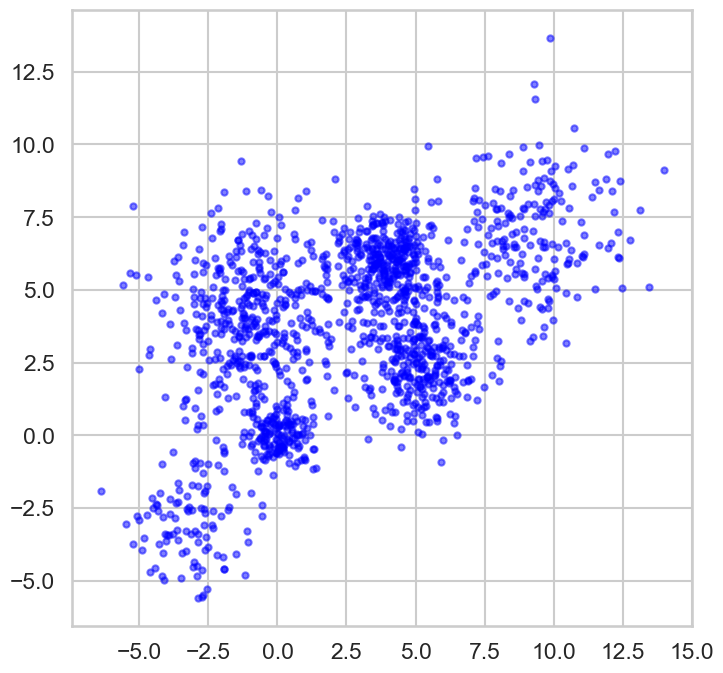

In [91]:
plt.rcParams['figure.figsize'] = [8,8]
sns.set_style("whitegrid")
sns.set_context("talk")

n_bins = 6  
centers = [(-3, -3), (0, 0), (5,2.5),(-1, 4), (4, 6), (9,7)]
Multi_blob_Data, y = make_blobs(n_samples=[100,150, 300, 400,300, 200], n_features=2, cluster_std=[1.3,0.6, 1.2, 1.7,0.9,1.7],
                  centers=centers, shuffle=False, random_state=42)
display_cluster(Multi_blob_Data)

### Kmeans 
* Use Kmeans with different values of K to cluster the above data 
* Display the outcome of each value of K 
* Plot distortion function versus K and choose the approriate value of k 
* Plot the silhouette_score versus K and use it to choose the best K 
* Store the silhouette_score for the best K for later comparison with other clustering techniques. 

In [92]:
def K_mean_method(Multi_blob_Data):
    distortions = []
    sil_scores = []
    for k in range(2, 10):
        km = KMeans(n_clusters=k, random_state=42)
        km.fit(Multi_blob_Data)
        distortions.append(km.inertia_)
        sil_scores.append(silhouette_score(Multi_blob_Data, km.labels_))
        display_cluster(Multi_blob_Data, km, k)

    # plot elbow graph to visualize the optimal number of clusters
    plt.plot(range(2, 10), distortions, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Distortion')
    plt.show()

    # plot silhouette score graph to visualize the optimal number of clusters
    plt.plot(range(2, 10), sil_scores, marker='o')
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.show()


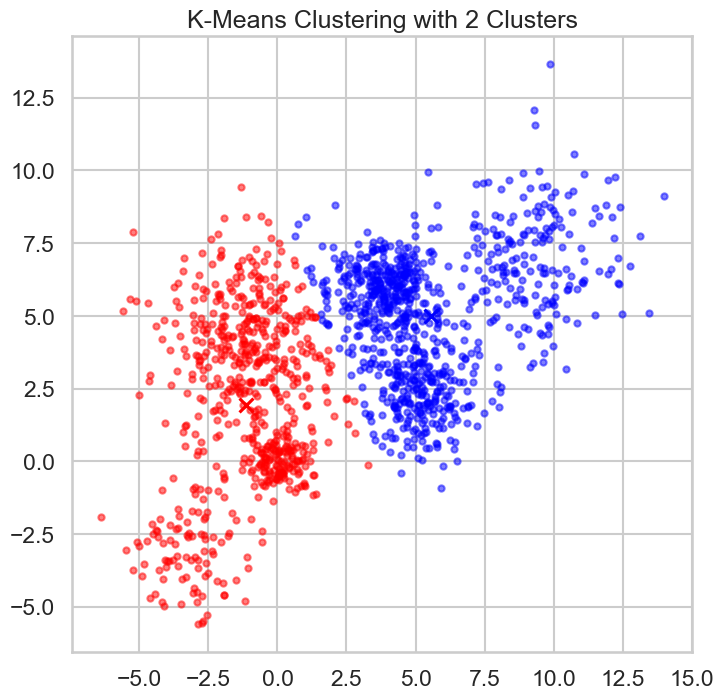

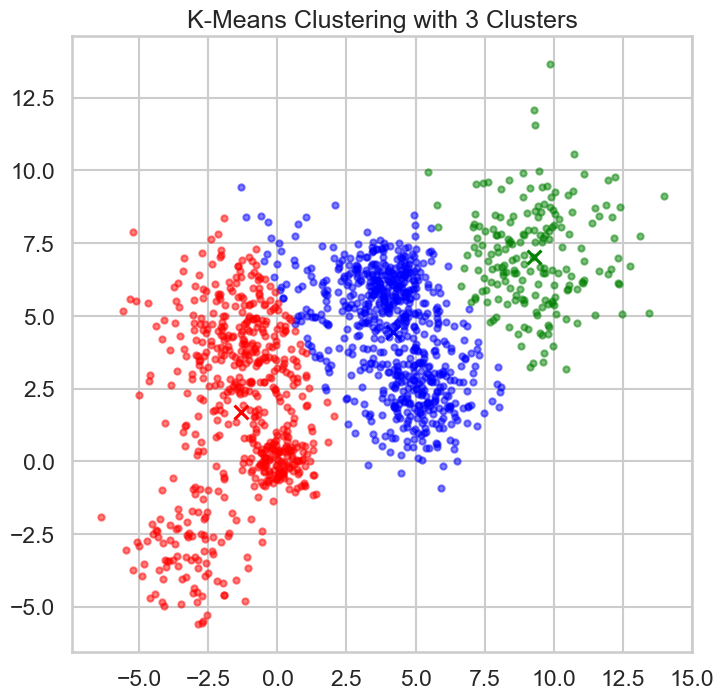

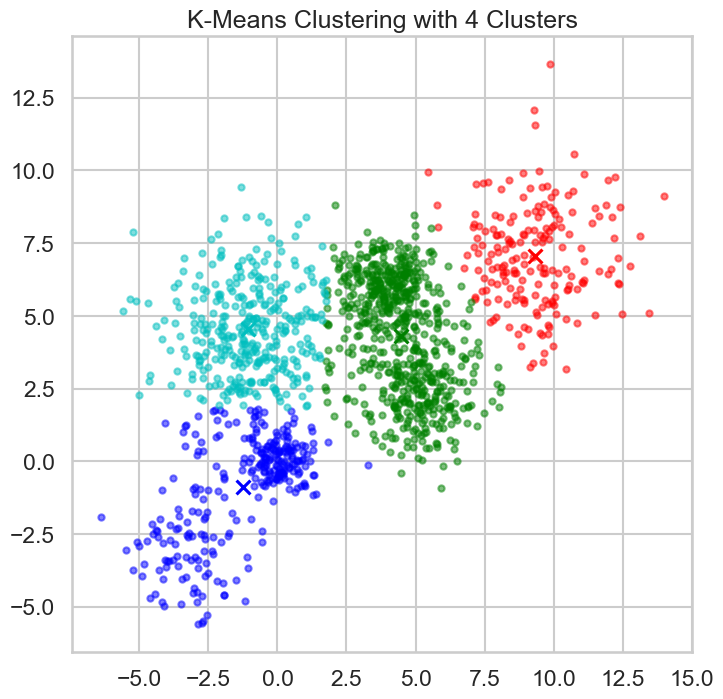

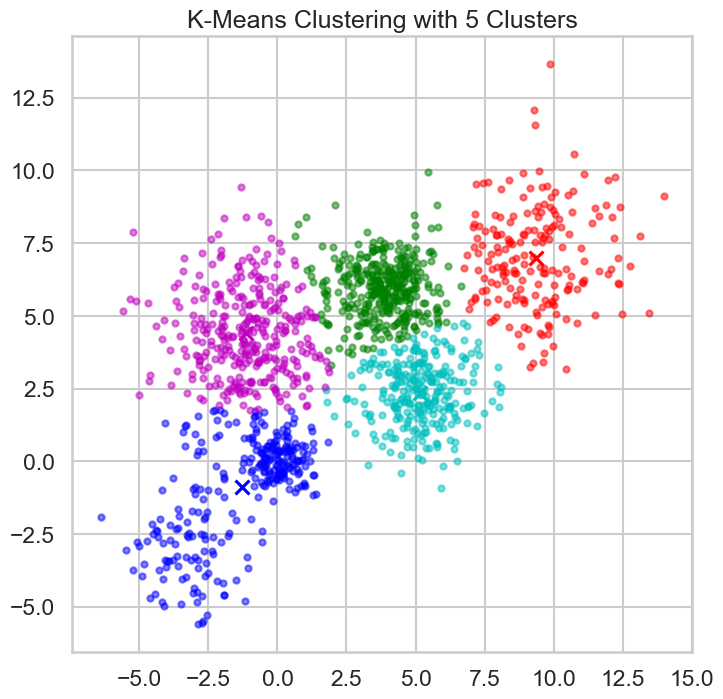

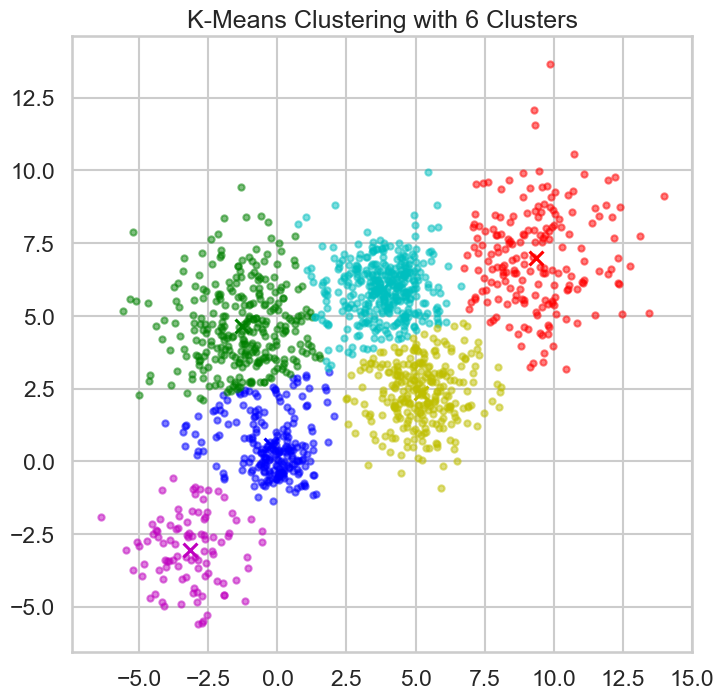

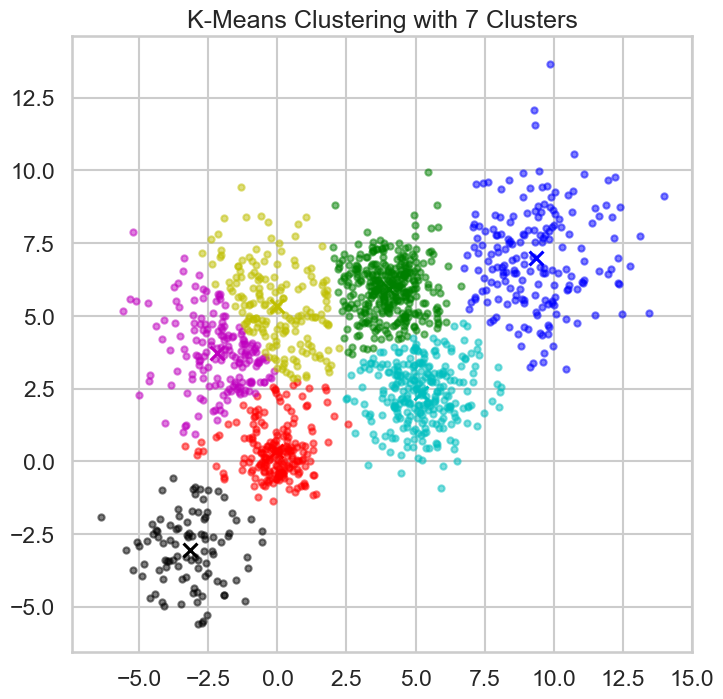

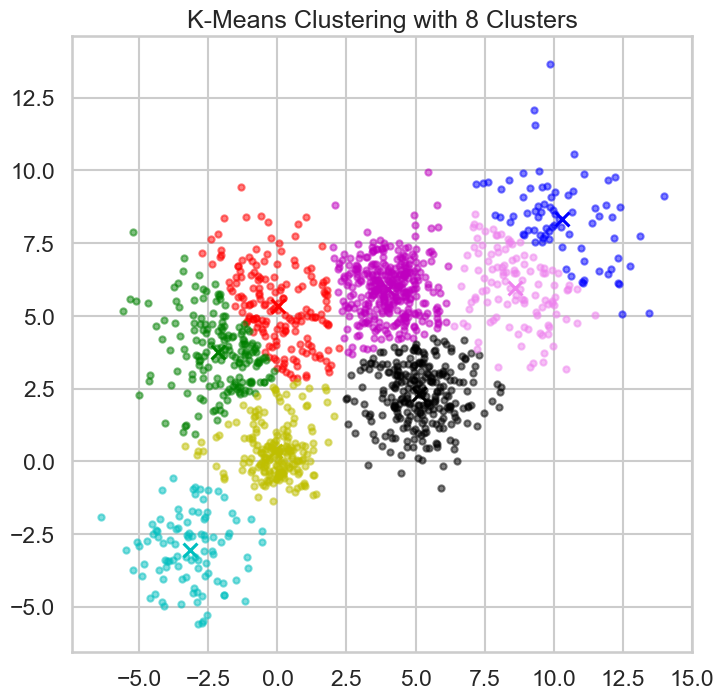

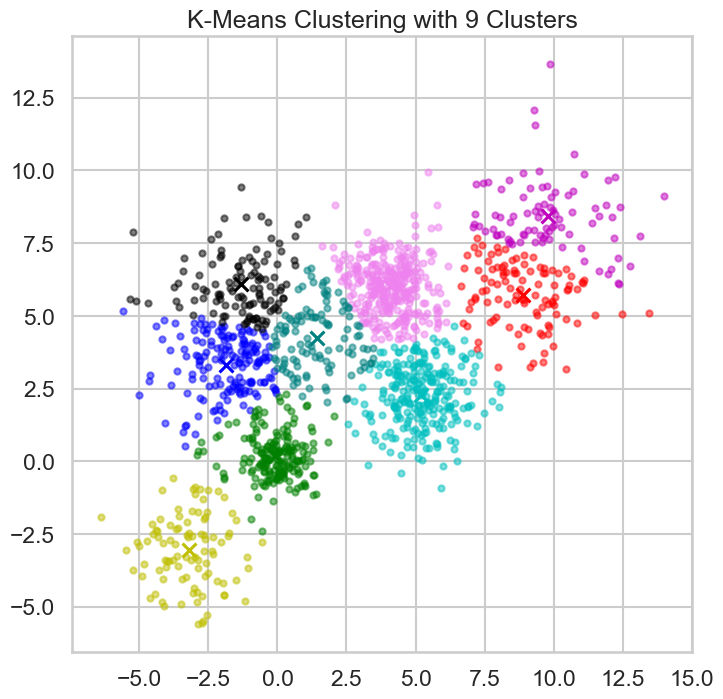

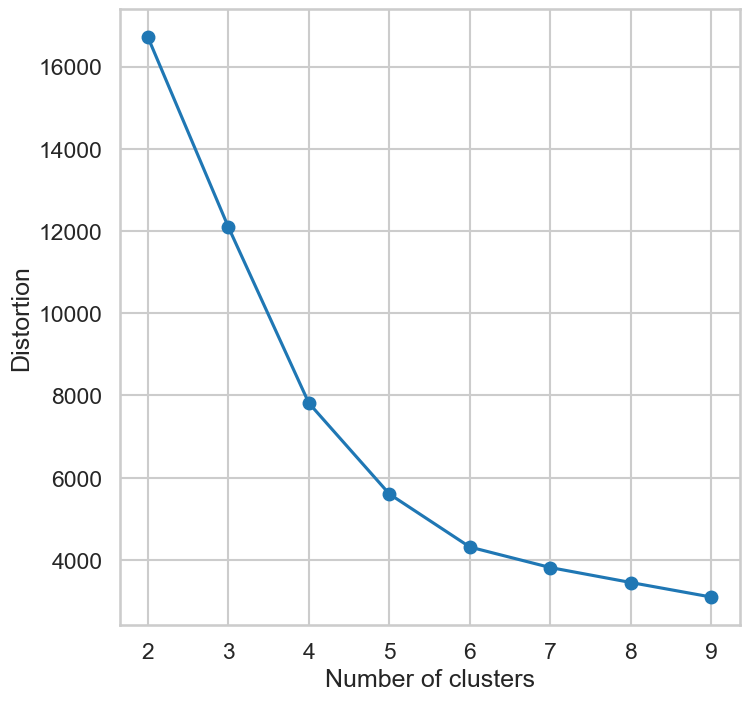

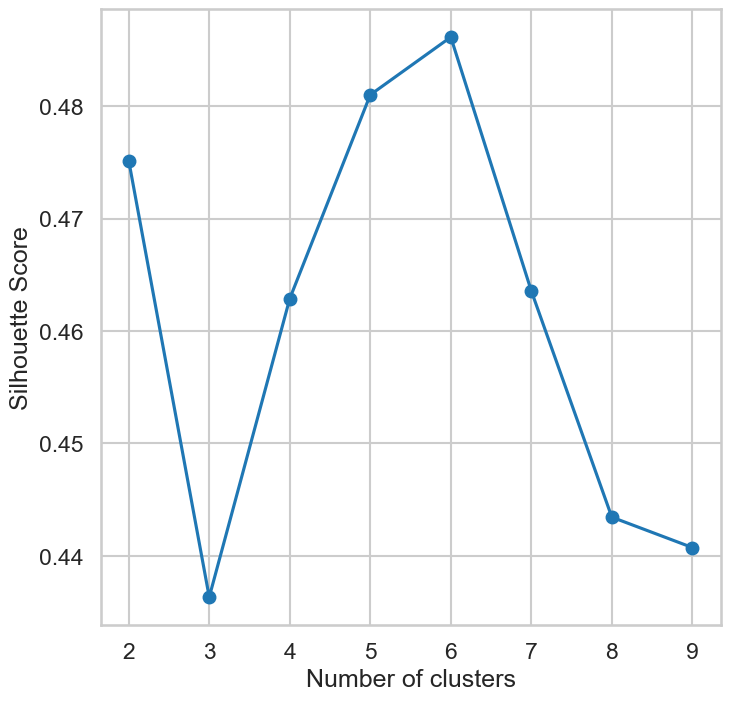

In [93]:
K_mean_method(Multi_blob_Data)

### Hierarchal Clustering
* Use AgglomerativeClustering function to  to cluster the above data 
* In the  AgglomerativeClustering change the following parameters 
    * Affinity (use euclidean, manhattan and cosine)
    * Linkage( use average and single )
    * Distance_threshold (try different)
* For each of these trials plot the Dendograph , calculate the silhouette_score and display the resulting clusters  
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observation 

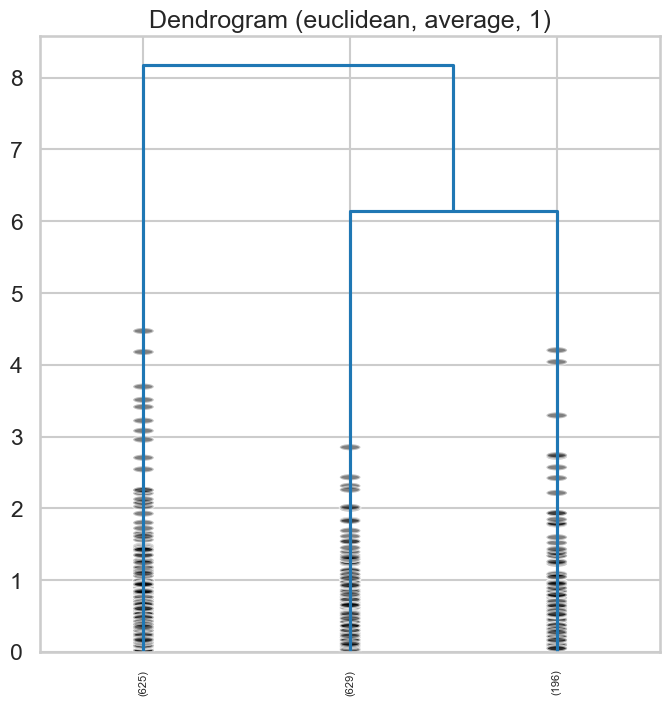

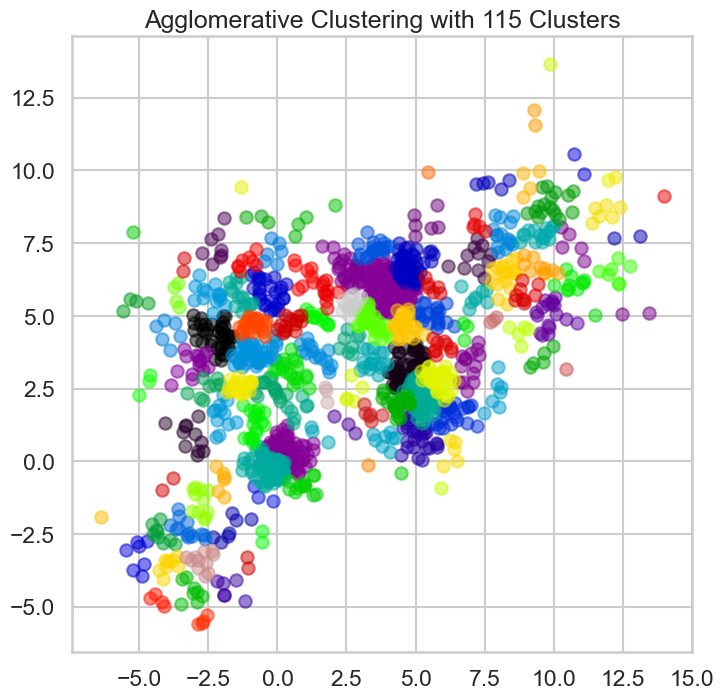

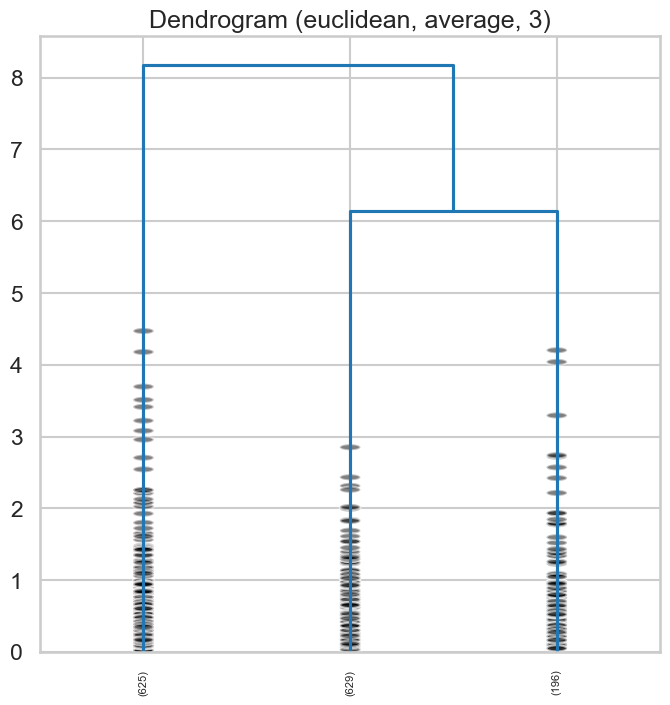

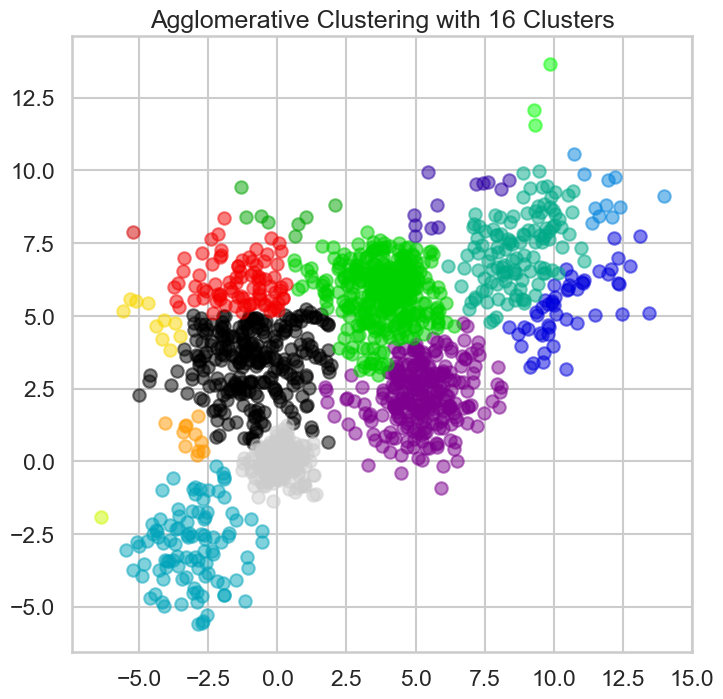

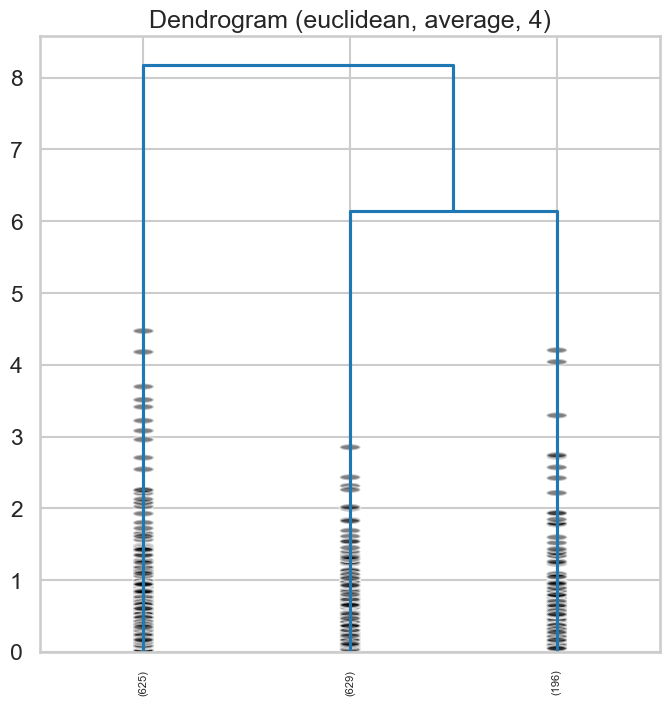

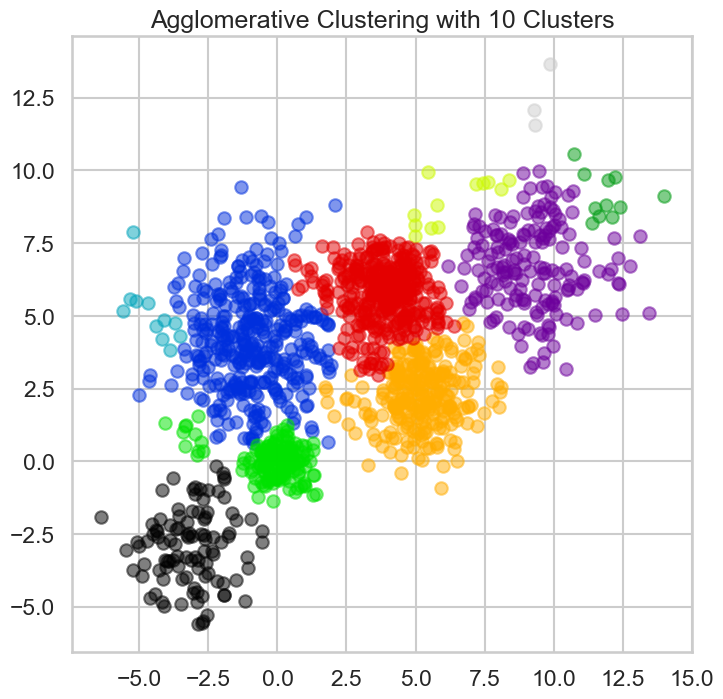

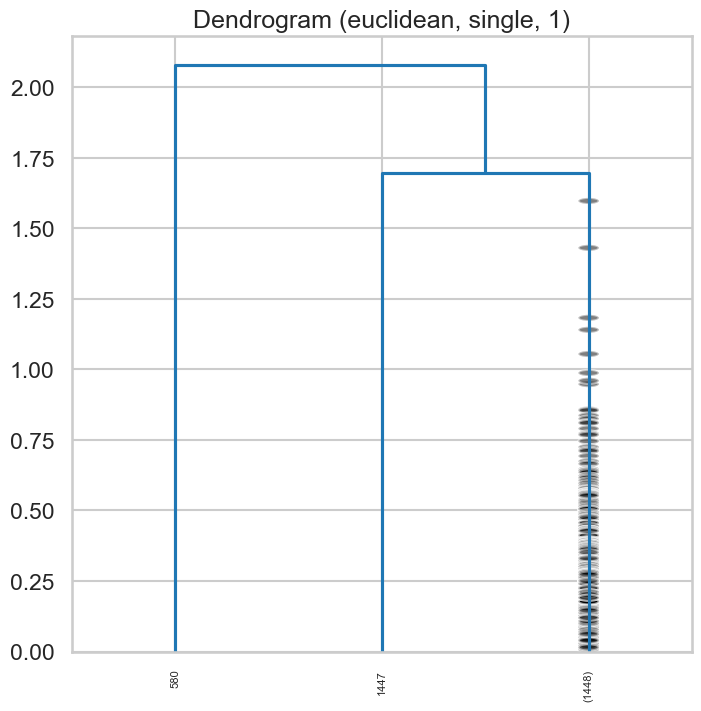

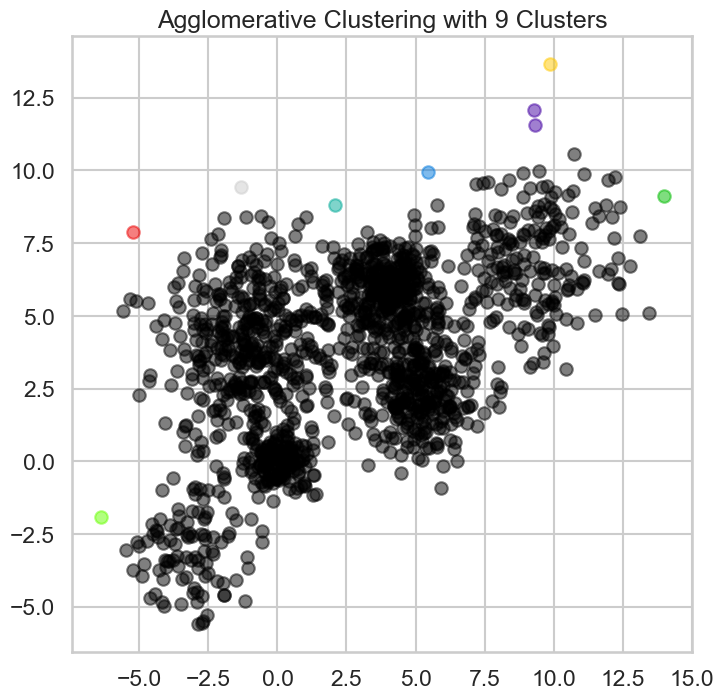

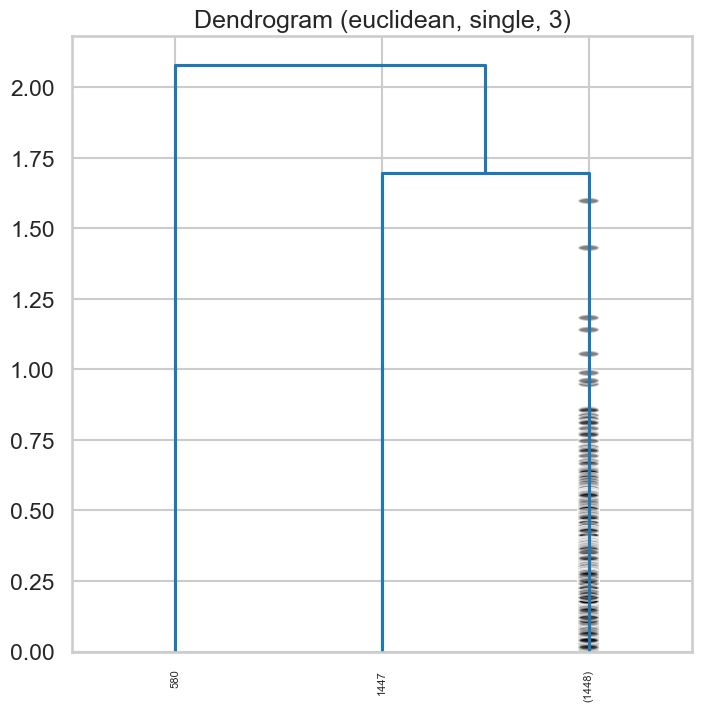

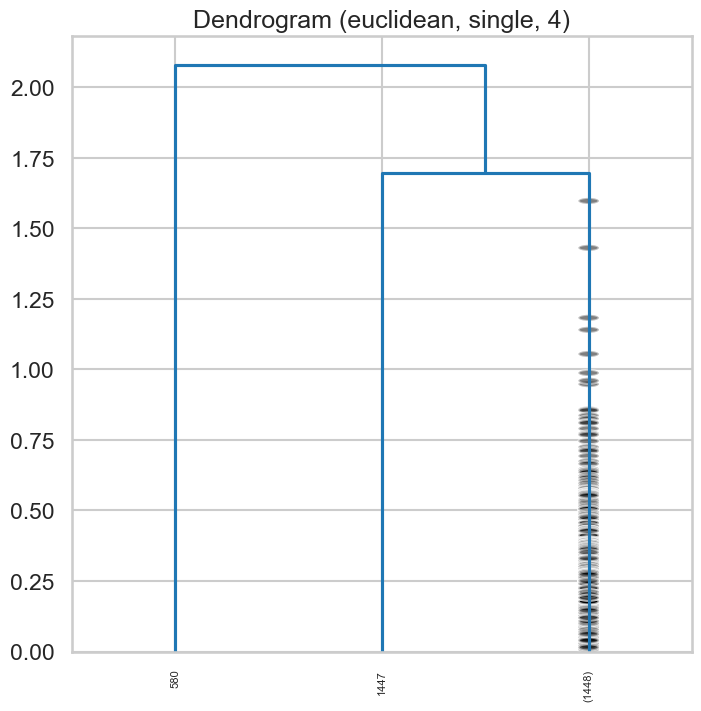

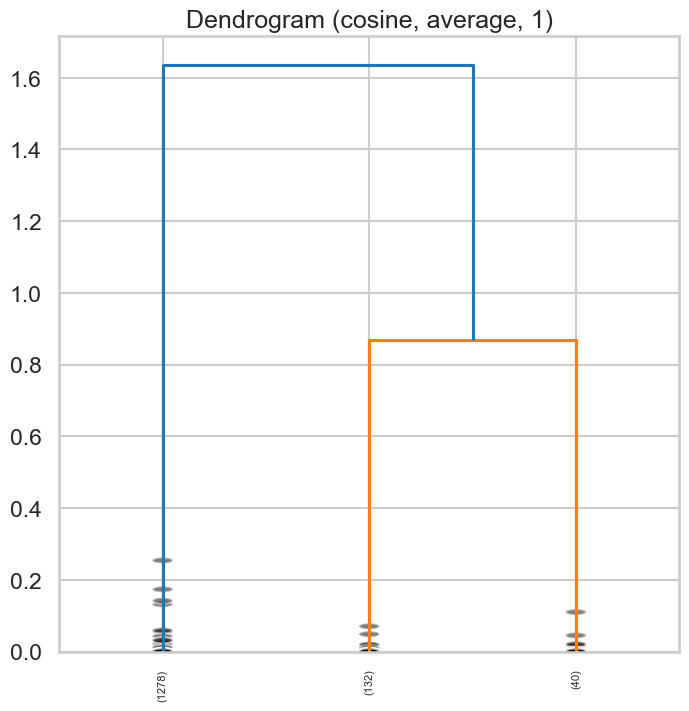

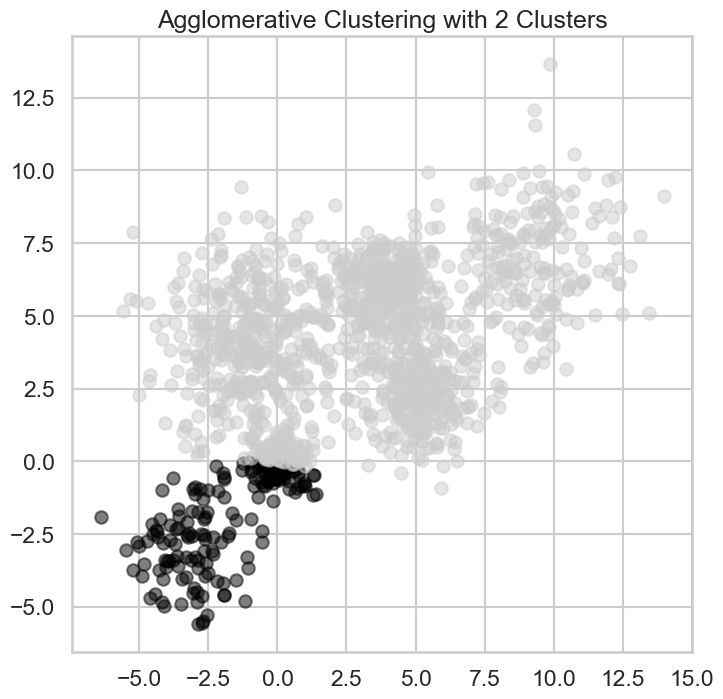

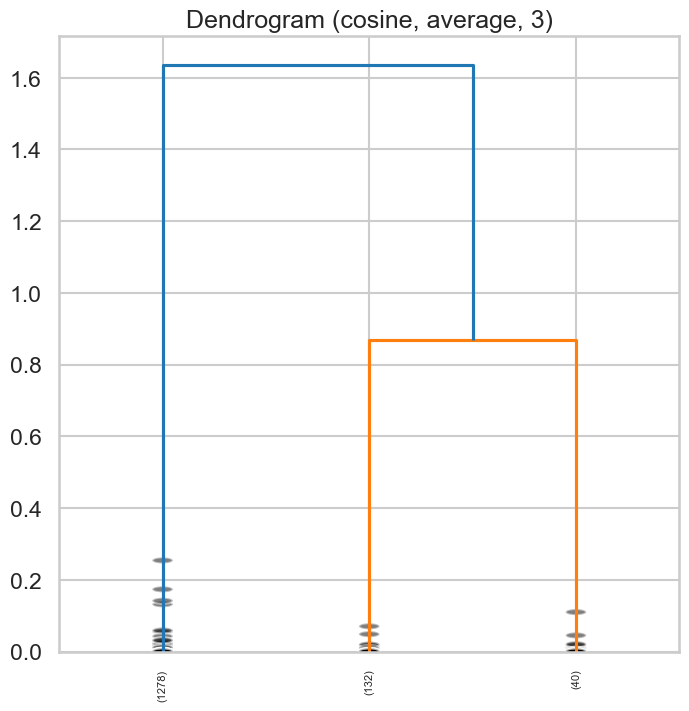

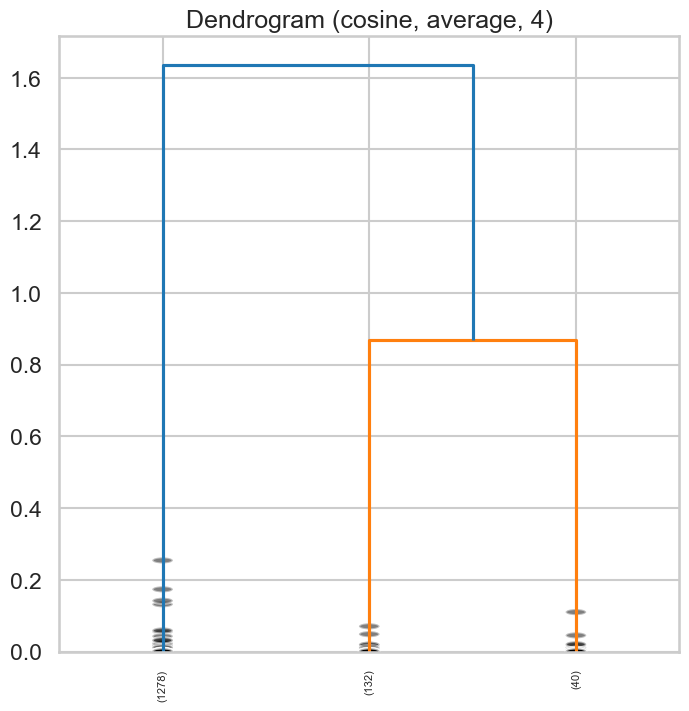

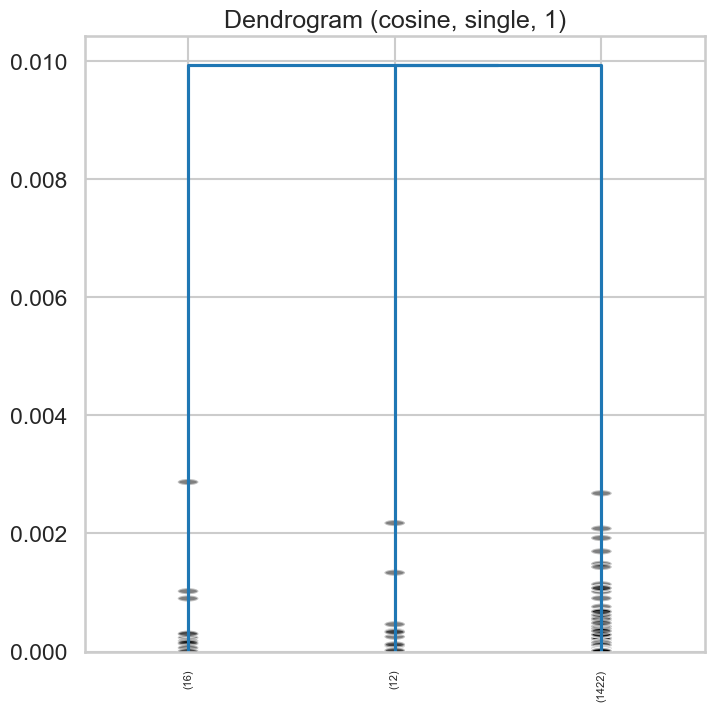

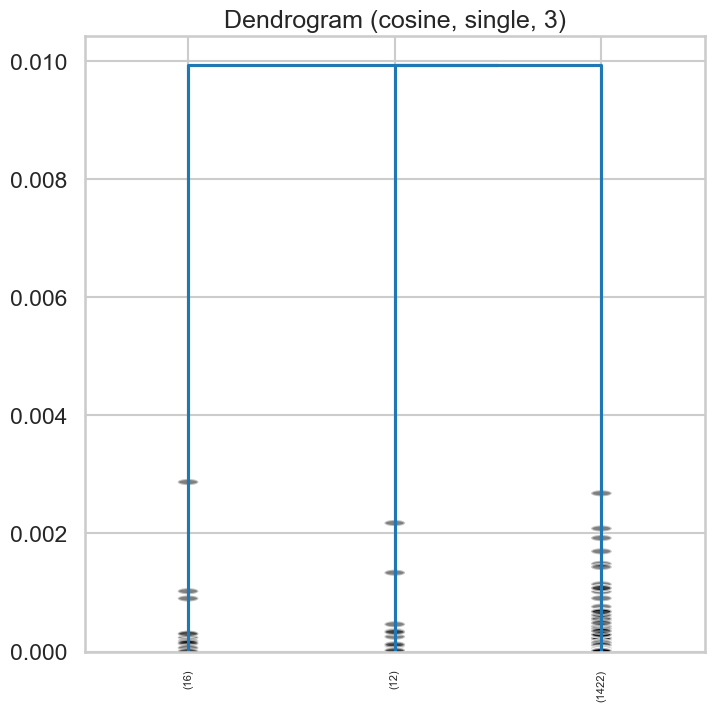

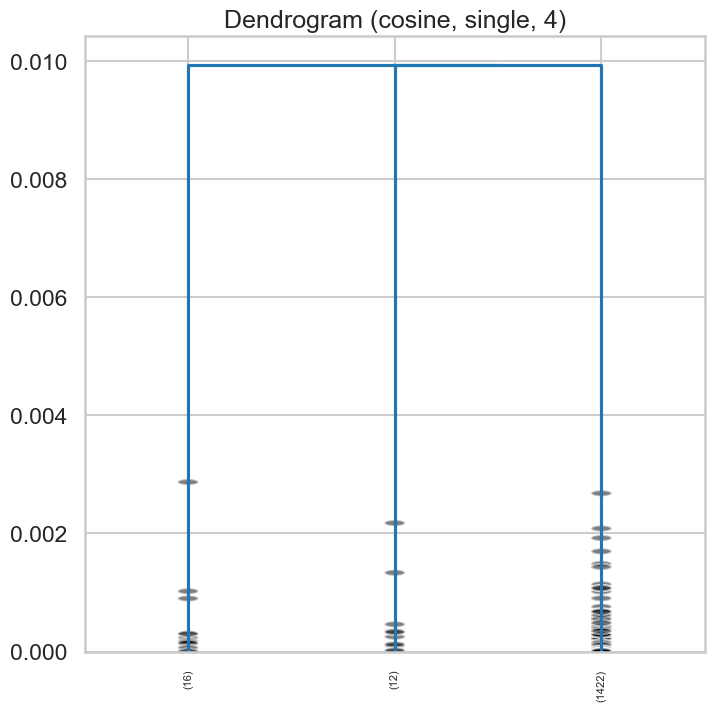

Best score: 0.37378418096239385
Best parameters: {'affinity': 'euclidean', 'linkage': 'average', 'distance_threshold': 4}


In [95]:
best_score = -1
best_params = {}

def display_cluster1(X, model, num_clusters):
    # Get the labels
    labels = model.labels_

    # Define the colors
    colors = plt.cm.nipy_spectral(np.linspace(0, 1, num_clusters))

    # Plot the data points and color them according to their labels
    for i in range(num_clusters):
        plt.scatter(X[labels==i,0], X[labels==i,1], color=colors[i], alpha=0.5)

    plt.title(f'Agglomerative Clustering with {num_clusters} Clusters')
    plt.show()


# Loop through different parameter combinations
for affinity in ['euclidean', 'cosine']:
    for linkage_type in ['average', 'single']:
        for distance_threshold in [1, 3, 4]:
            # Create the clustering model
            model = AgglomerativeClustering(affinity=affinity, linkage=linkage_type, distance_threshold=distance_threshold, n_clusters=None)

            # Cluster the data and get the linkage matrix
            Z = linkage(Multi_blob_Data, method=linkage_type, metric=affinity)

            # Plot dendrogram
            plt.title(f"Dendrogram ({affinity}, {linkage_type}, {distance_threshold})")
            dendrogram(Z, truncate_mode='lastp', p=3, leaf_rotation=90., leaf_font_size=8., show_contracted=True)
            plt.show()

            # Calculate silhouette score
            labels = model.fit_predict(Multi_blob_Data)
            # print(f"labels: {len(labels)}")
            if len(set(labels)) > 1:
                score = silhouette_score(Multi_blob_Data, labels)


                # Update the best score and parameters if necessary
                if score > best_score:
                    best_score = score
                    best_params['affinity'] = affinity
                    best_params['linkage'] = linkage_type
                    best_params['distance_threshold'] = distance_threshold

                # Display the resulting clusters
                display_cluster1(np.array(Multi_blob_Data), model, len(set(labels)))

# Print the best score and parameters
print(f"Best score: {best_score}")
print(f"Best parameters: {best_params}")

### DBScan
* Use DBScan function to  to cluster the above data 
* In the  DBscan change the following parameters 
    * EPS (from 0.1 to 3)
    * Min_samples (from 5 to 25)
* Plot the silhouette_score versus the variation in the EPS and the min_samples
* Plot the resulting Clusters in this case 
* Find the set of paramters that would find result in the best silhouette_score and store this score for later comparison with other clustering techniques. 
* Record your observations and comments 

In [69]:
def display_cluster_dbscan(X, model, num_clusters):
    # Get the labels
    labels = model.labels_

    # Define the colors
    colors = plt.cm.nipy_spectral(np.linspace(0, 1, num_clusters))

    # Plot the data points and color them according to their labels
    for i in range(num_clusters):
        plt.scatter(X[labels==i,0], X[labels==i,1], color=colors[i], alpha=0.5)

    plt.title(f'Agglomerative Clustering with {num_clusters} Clusters')
    plt.show()

def DBScan_method(Multi_blob_Data):
    # Define range of parameters for EPS and min_samples
    EPS_range = np.arange(start=0.1, stop=3.1, step=0.1)
    min_samples_range = np.arange(start=5, stop=26, step=5)

    # Initialize best silhouette score to a low value
    best_silhouette_score = -1
    best_silhouette_score = 0
    best_eps = 0
    best_min_samples = 0
    best_dbscan = 0
    best_num_clusters = 0

    # Loop over all combinations of EPS and min_samples values
    for eps in EPS_range:
        for min_samples in min_samples_range:
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(Multi_blob_Data)

            # Skip if only one cluster was created
            if len(set(dbscan.labels_)) == 1:
                continue

            num_clusters = len(set(dbscan.labels_)) - (1 if -1 in dbscan.labels_ else 0)
            silhouette_avg = silhouette_score(Multi_blob_Data, dbscan.labels_)

            # If this clustering produced a higher silhouette score than previous ones, save it
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples
                best_dbscan = dbscan
                best_num_clusters = num_clusters

    # Print out the best set of parameters and resulting silhouette score
    print("Best parameters: eps = {}, min_samples = {}".format(best_eps, best_min_samples))
    print("Best silhouette score: {}".format(best_silhouette_score))

    # Plot the silhouette score versus variation in the EPS and the min_samples
    silhouette_scores = np.zeros((len(EPS_range), len(min_samples_range)))
    for i, eps in enumerate(EPS_range):
        for j, min_samples in enumerate(min_samples_range):
            dbscan = DBSCAN(eps=eps, min_samples=min_samples)
            dbscan.fit(Multi_blob_Data)
            if len(set(dbscan.labels_)) == 1:
                continue
            silhouette_scores[i, j] = silhouette_score(Multi_blob_Data, dbscan.labels_)
    plt.imshow(silhouette_scores, cmap='hot', interpolation='nearest', extent=[min_samples_range.min(), min_samples_range.max(), EPS_range.min(), EPS_range.max()])
    plt.xlabel('min_samples')
    plt.ylabel('EPS')
    plt.colorbar()
    plt.show()

    # Reshape the data to use with plot function
    x = min_samples_range
    y = EPS_range
    z = silhouette_scores.reshape(len(EPS_range), len(min_samples_range))

    # Find the maximum silhouette score and its indices
    max_score = np.max(silhouette_scores)
    max_indices = np.argwhere(silhouette_scores == max_score)

    # Plot the results as a line chart
    fig, ax = plt.subplots()
    ax.plot(x, z[max_indices[0][0]], label=f'EPS = {y[max_indices[0][1]]}')
    ax.set_xlabel('min_samples')
    ax.set_ylabel('Silhouette Score')
    ax.set_title('Silhouette Score vs Variation in EPS and min_samples')
    ax.legend()
    plt.show()

    # Initialize an empty list to store the best silhouette score for each value of eps
    # best_scores = []

    # Loop over all values of EPS_range
    # for eps in EPS_range:
    #     silhouette_scores = []
    #     for min_samples in min_samples_range:
    #         dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    #         dbscan.fit(Multi_blob_Data)
    #         if len(set(dbscan.labels_)) == 1:
    #             continue
    #         silhouette_scores.append(silhouette_score(Multi_blob_Data, dbscan.labels_))
    #     best_scores.append(max(silhouette_scores))

    # # Plot the silhouette score for each value of eps
    # plt.plot(EPS_range, best_scores)
    # plt.xlabel('EPS')
    # plt.ylabel('Silhouette Score')
    # plt.title('Silhouette Score vs. EPS for DBSCAN')
    # plt.show()

    # Plot the resulting clusters
    if(best_eps>0 and min_samples>0):
        display_cluster_dbscan(Multi_blob_Data, best_dbscan, best_num_clusters)


Best parameters: eps = 2.1, min_samples = 10
Best silhouette score: 0.4685207355522043


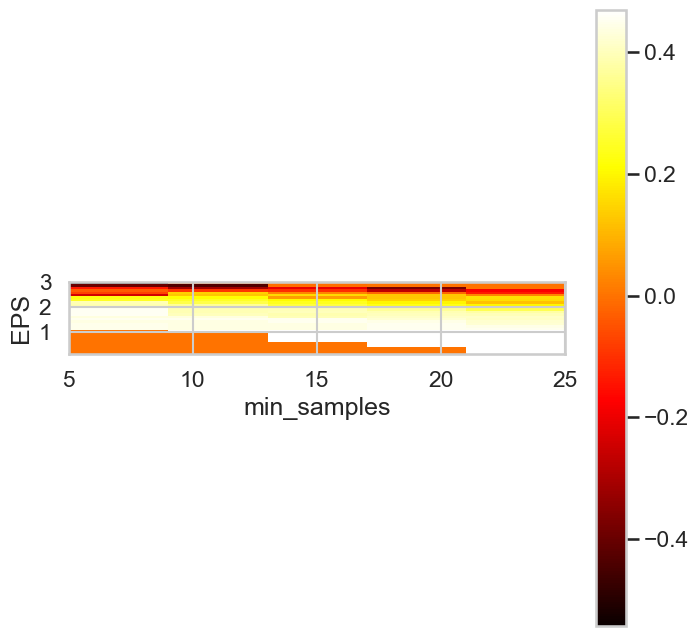

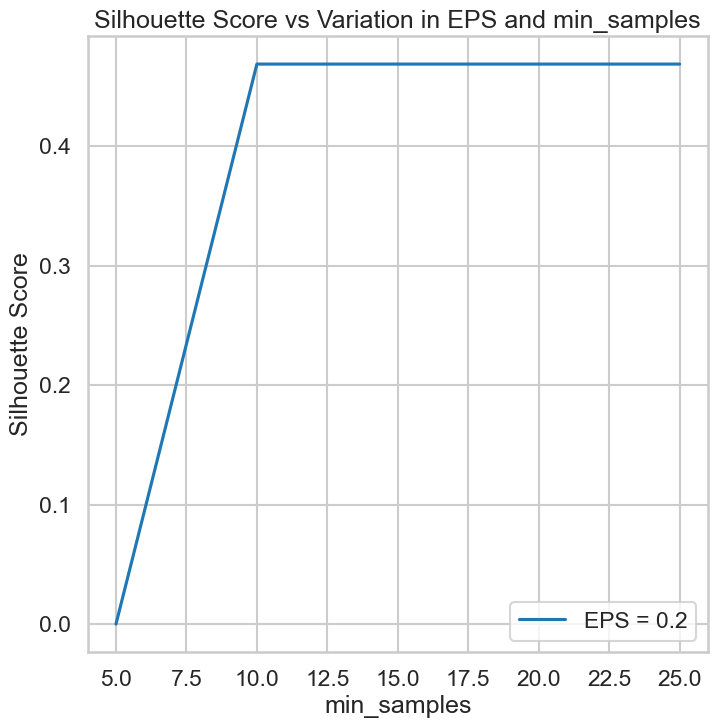

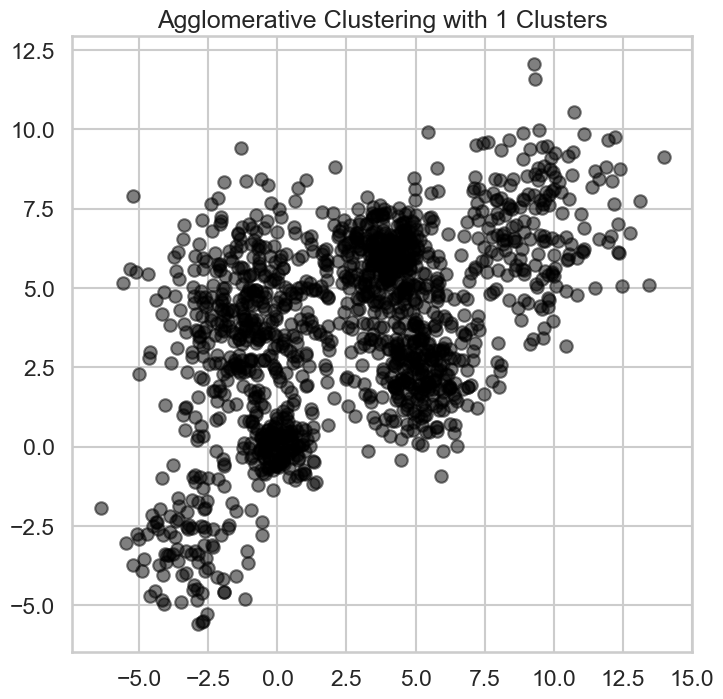

In [70]:
DBScan_method(Multi_blob_Data)

### Gaussian Mixture
* Use GaussianMixture function to cluster the above data 
* In GMM change the covariance_type and check the difference in the resulting proabability fit 
* Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 

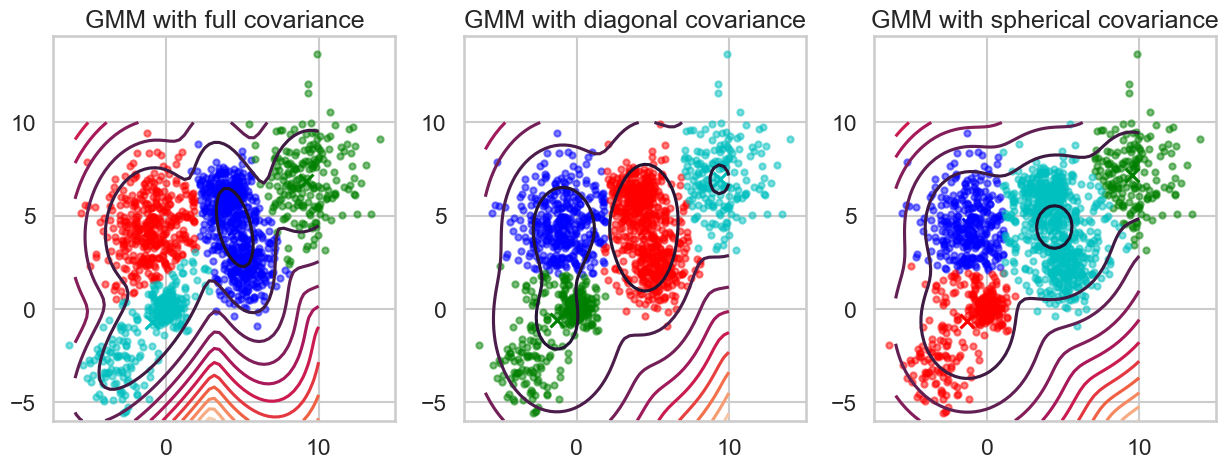

In [192]:
# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X, km=None, gmm=None, num_clusters=0, ax=None):
    color = 'brgcmyk'  # List colors
    alpha = 0.5  # color opacity
    s = 20
    if ax is None:
        ax = plt.gca()
    if num_clusters == 0:
        ax.scatter(X[:, 0], X[:, 1], c=color[0], alpha=alpha, s=s)
    elif km is not None:
        for i in range(num_clusters):
            ax.scatter(X[km.predict(X)==i, 0], X[km.predict(X)==i, 1], c=color[i], alpha=alpha, s=s)
            ax.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], c=color[i], marker='x', s=100)
    elif gmm is not None:
        for i in range(num_clusters):
            ax.scatter(X[gmm.predict(X)==i, 0], X[gmm.predict(X)==i, 1], c=color[i], alpha=alpha, s=s)
            ax.scatter(gmm.means_[i][0], gmm.means_[i][1], c=color[i], marker='x', s=100)



# Use GaussianMixture function to cluster the data
gmm = GaussianMixture(n_components=4)
gmm.fit(Multi_blob_Data)

# In GMM change the covariance_type and check the difference in the resulting probability fit 
gmm_diag = GaussianMixture(n_components=4, covariance_type='diag')
gmm_diag.fit(Multi_blob_Data)

gmm_spherical = GaussianMixture(n_components=4, covariance_type='spherical')
gmm_spherical.fit(Multi_blob_Data)

# Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot GMM with full covariance type
ax[0].set_title("GMM with full covariance")
display_cluster(Multi_blob_Data, gmm=gmm, num_clusters=4, ax=ax[0])
x = np.linspace(-6, 10)
y = np.linspace(-6, 10)
X_mesh, Y_mesh = np.meshgrid(x, y)
Z_mesh = -gmm.score_samples(np.array([X_mesh.ravel(), Y_mesh.ravel()]).T)
Z_mesh = Z_mesh.reshape(X_mesh.shape)
ax[0].contour(X_mesh, Y_mesh, Z_mesh, levels=10)

# Plot GMM with diagonal covariance type
ax[1].set_title("GMM with diagonal covariance")
display_cluster(Multi_blob_Data, gmm=gmm_diag, num_clusters=4, ax=ax[1])
x = np.linspace(-6, 10)
y = np.linspace(-6, 10)
X_mesh, Y_mesh = np.meshgrid(x, y)
Z_mesh = -gmm_diag.score_samples(np.array([X_mesh.ravel(), Y_mesh.ravel()]).T)
Z_mesh = Z_mesh.reshape(X_mesh.shape)
ax[1].contour(X_mesh, Y_mesh, Z_mesh, levels=10)

# Plot GMM with spherical covariance type
ax[2].set_title("GMM with spherical covariance")
display_cluster(Multi_blob_Data, gmm=gmm_spherical, num_clusters=4, ax=ax[2])
x = np.linspace(-6, 10)
y = np.linspace(-6, 10)
X_mesh, Y_mesh = np.meshgrid(x, y)
Z_mesh = -gmm_spherical.score_samples(np.array([X_mesh.ravel(), Y_mesh.ravel()]).T)
Z_mesh = Z_mesh.reshape(X_mesh.shape)
ax[2].contour(X_mesh, Y_mesh, Z_mesh, levels=10)

plt.show()

## iris data set 
The iris data set is test data set that is part of the Sklearn module 
which contains 150 records each with 4 features. All the features are represented by real numbers 

The data represents three classes 


In [20]:
from sklearn.datasets import load_iris
iris_data = load_iris()
iris_data.target[[10, 25, 50]]
#array([0, 0, 1])
list(iris_data.target_names)
['setosa', 'versicolor', 'virginica']
iris_data.data


array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

* Repeat all the above clustering approaches and steps on the above data 
* Normalize the data then repeat all the above steps 
* Compare between the different clustering approaches 

### Kmeans

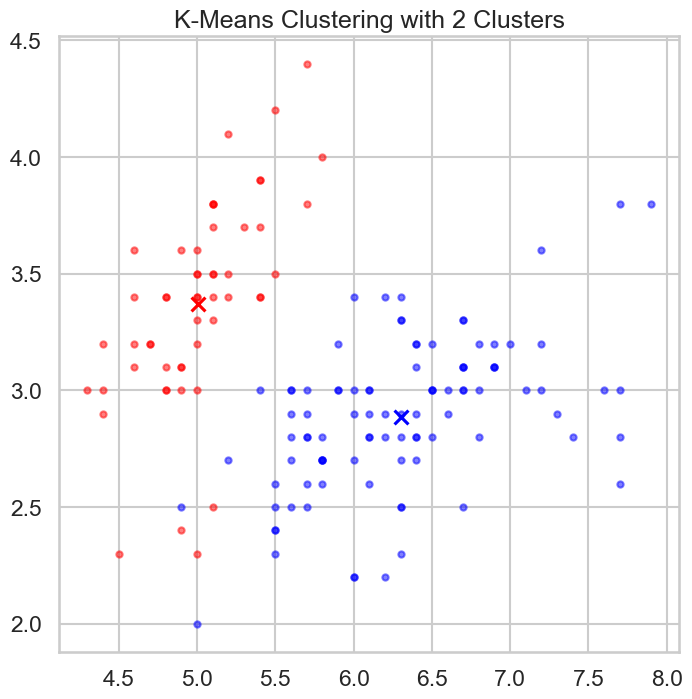

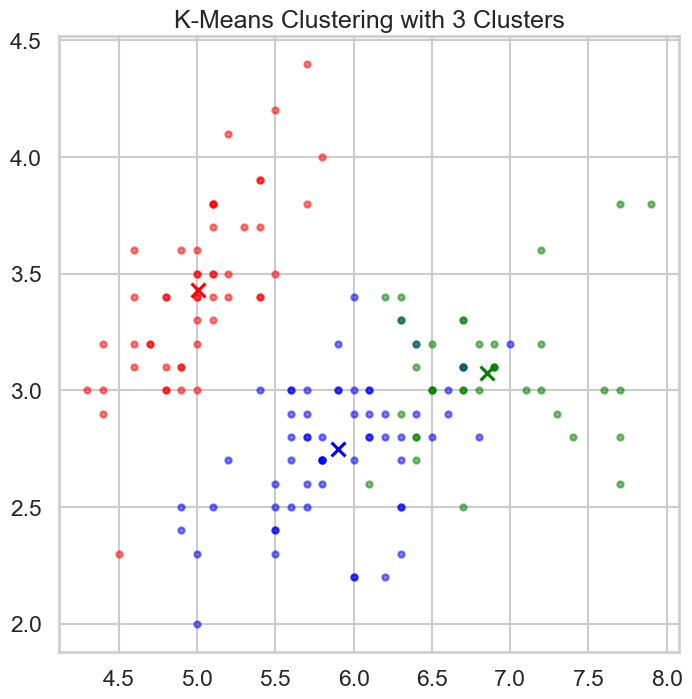

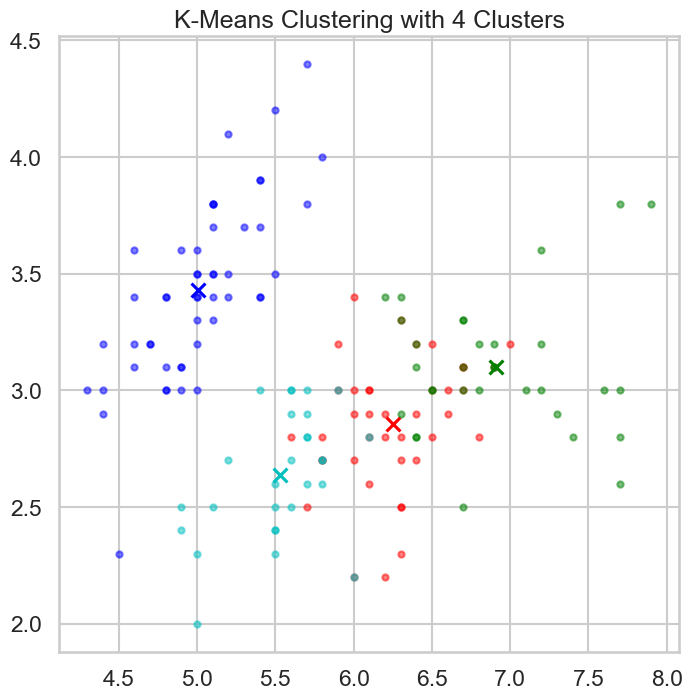

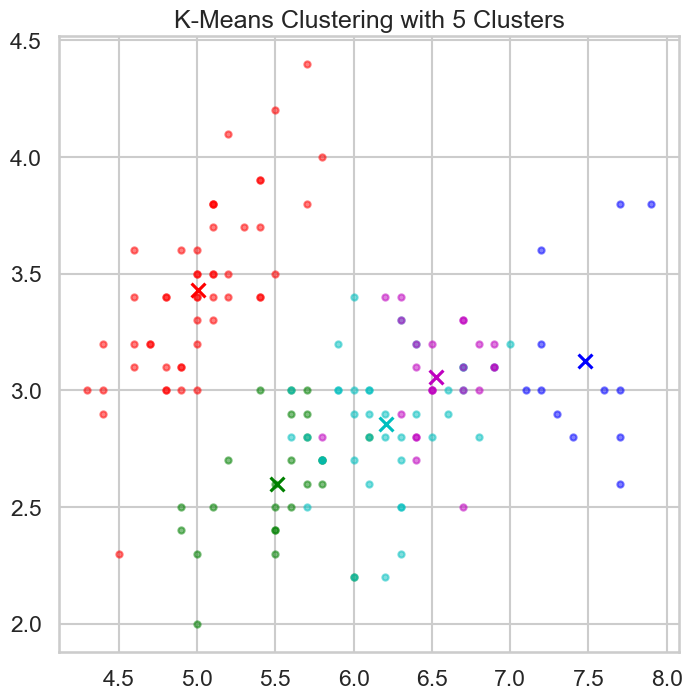

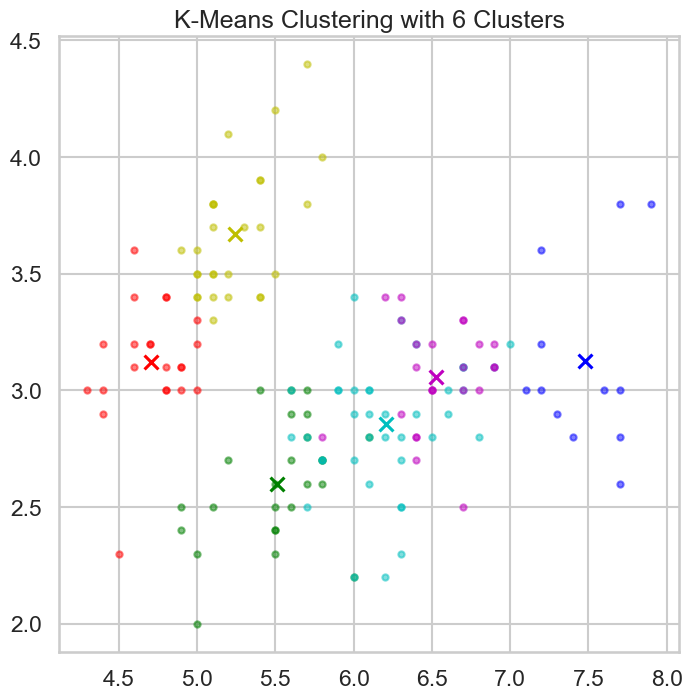

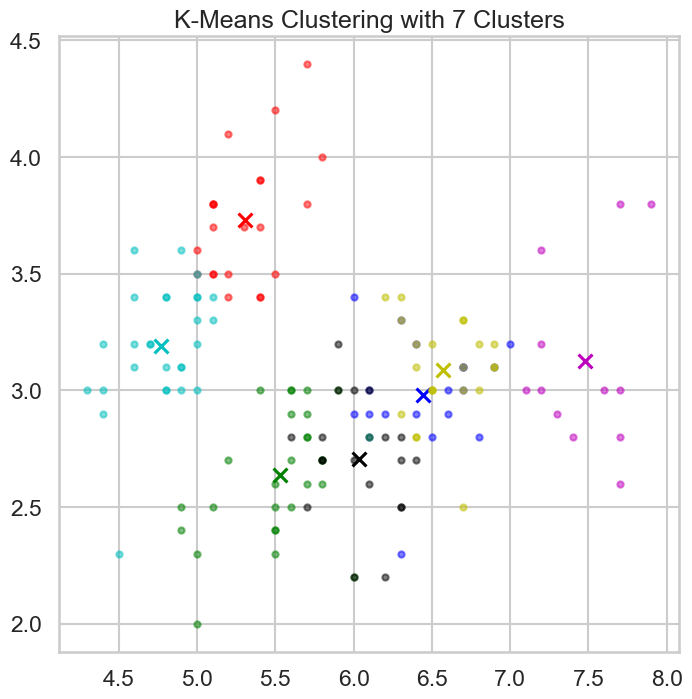

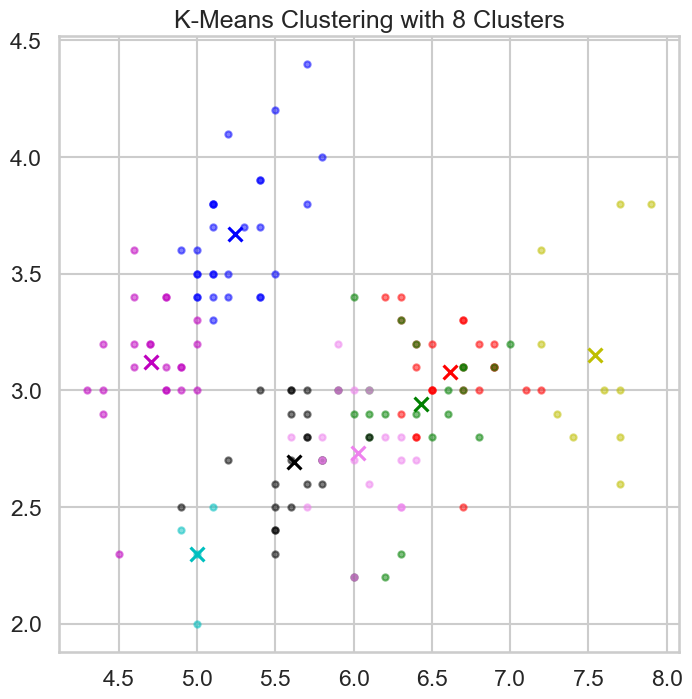

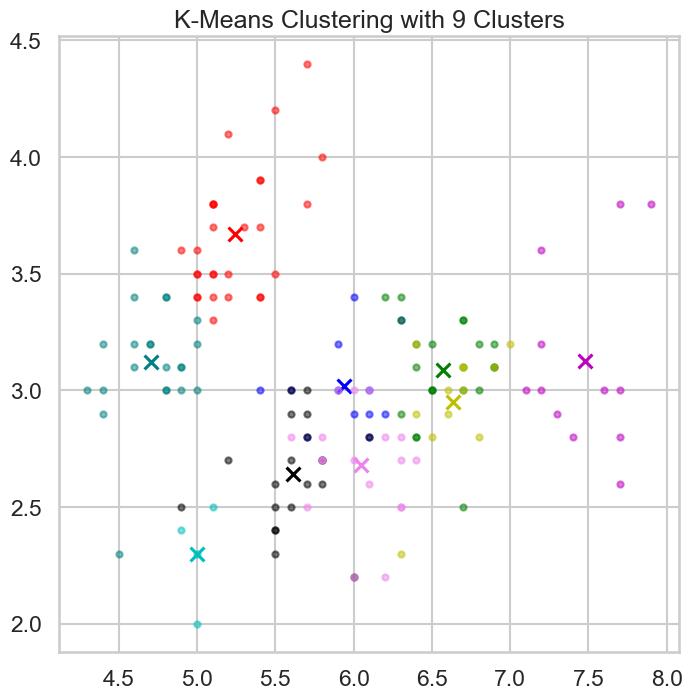

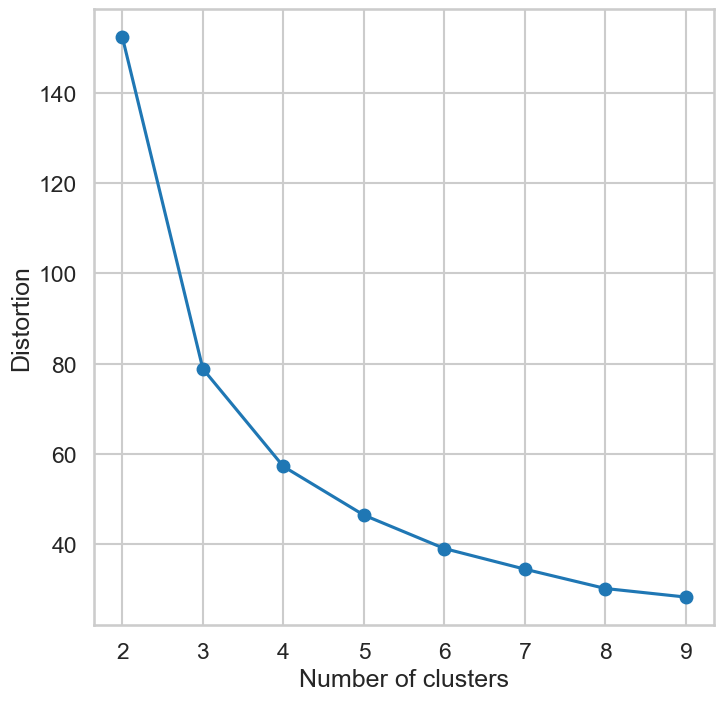

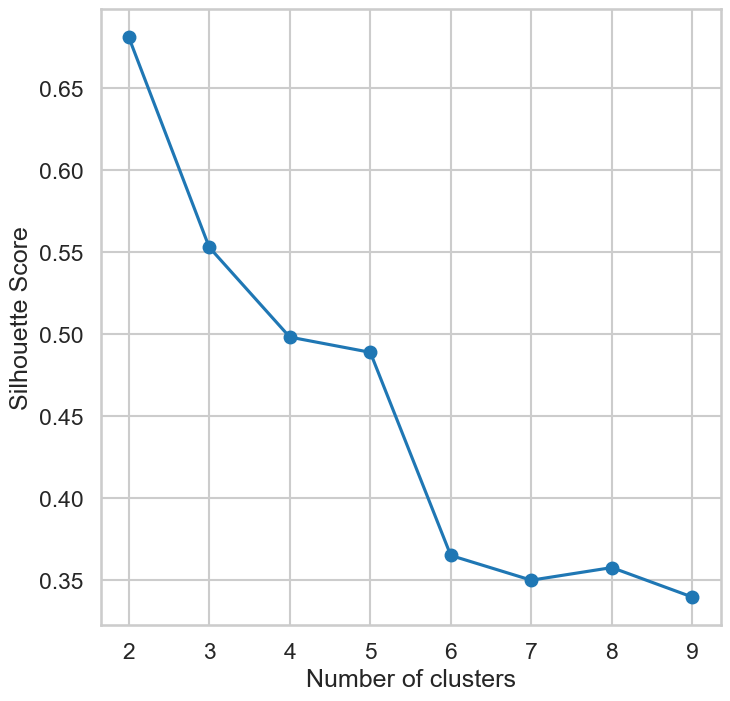

In [79]:
K_mean_method(iris_data.data)


### Hierarchal Clustering 

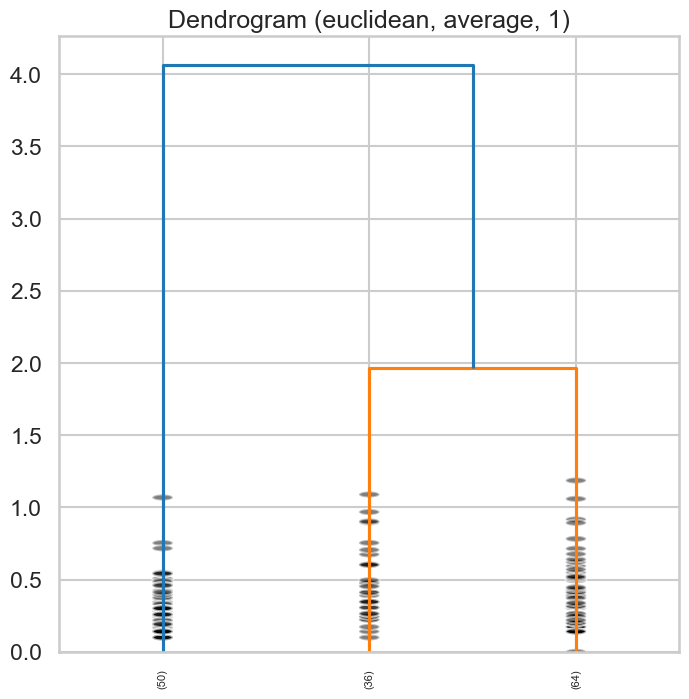

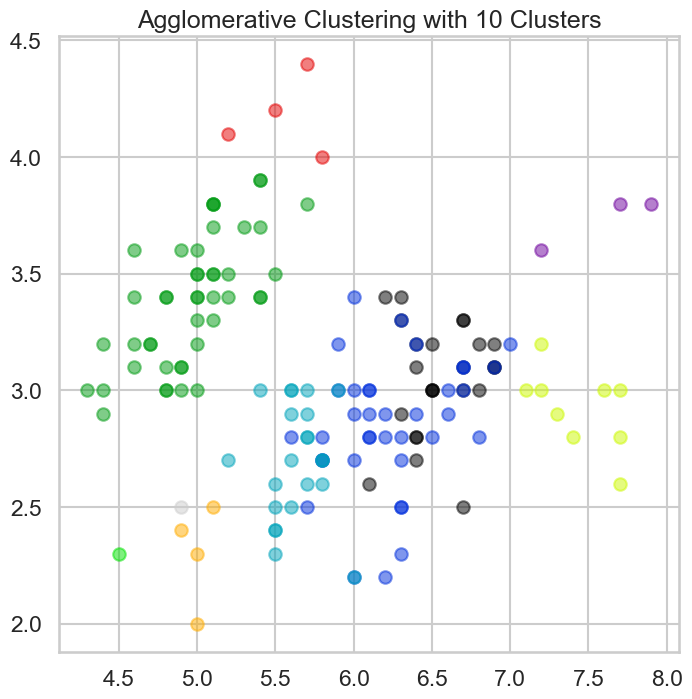

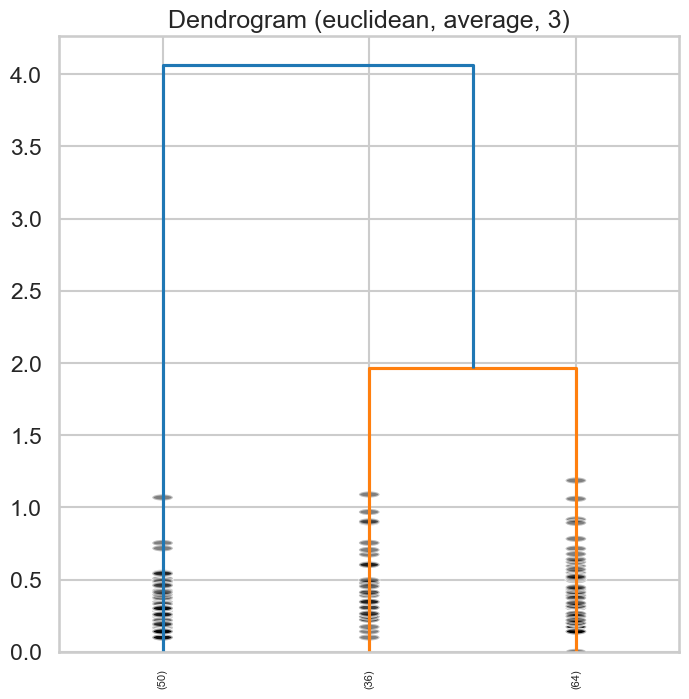

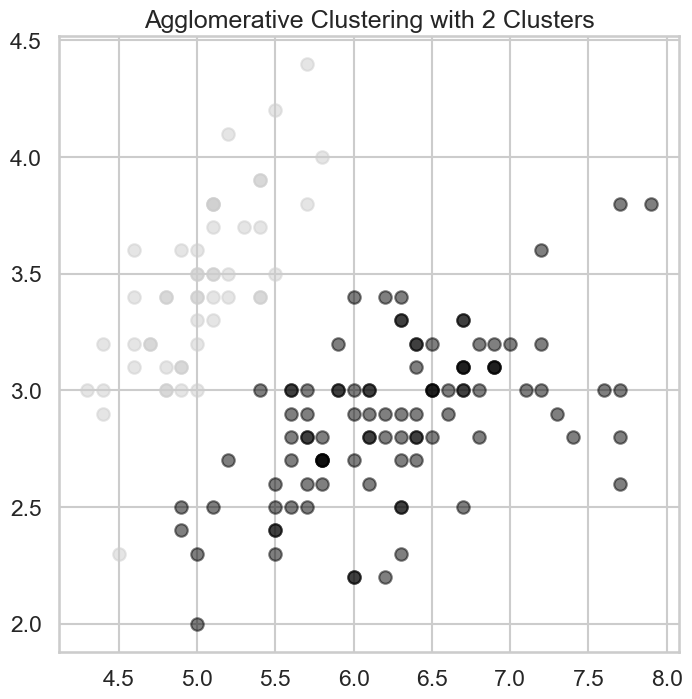

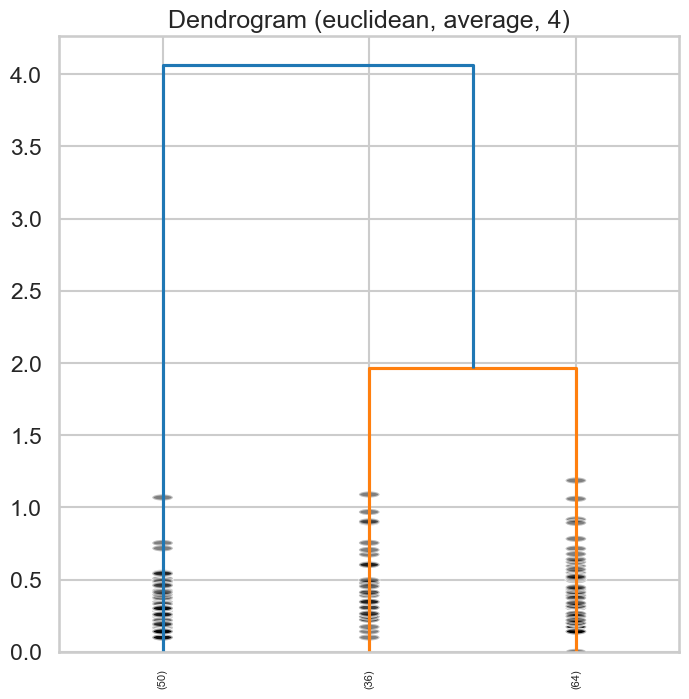

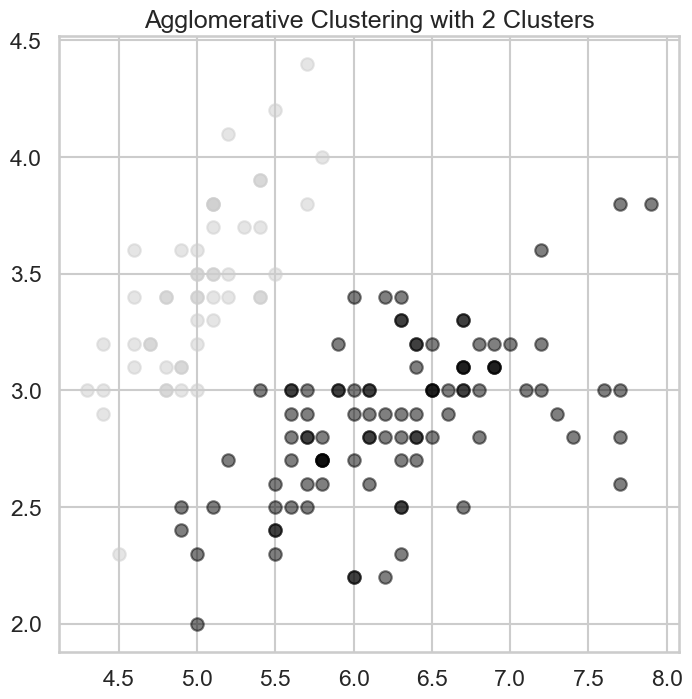

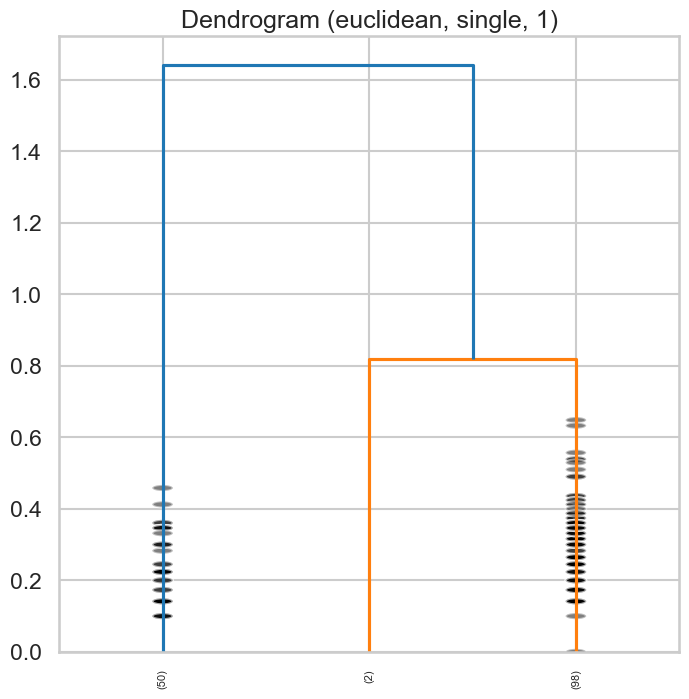

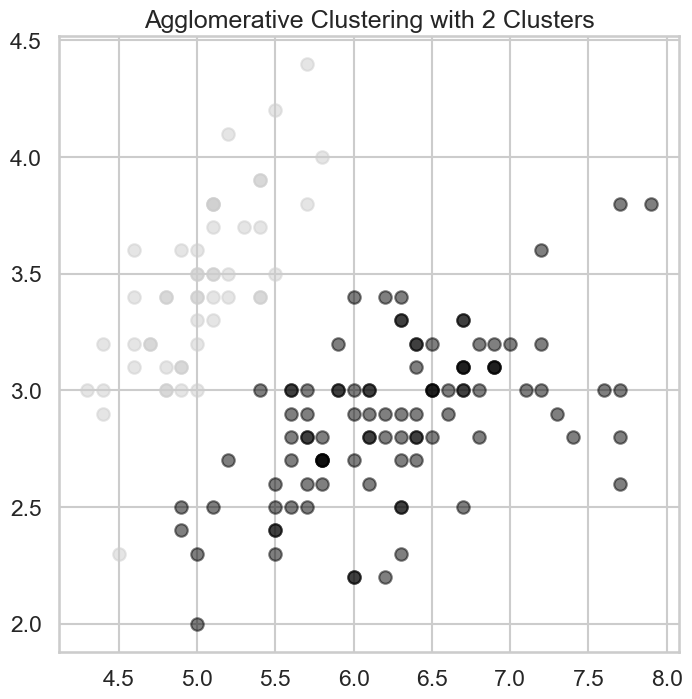

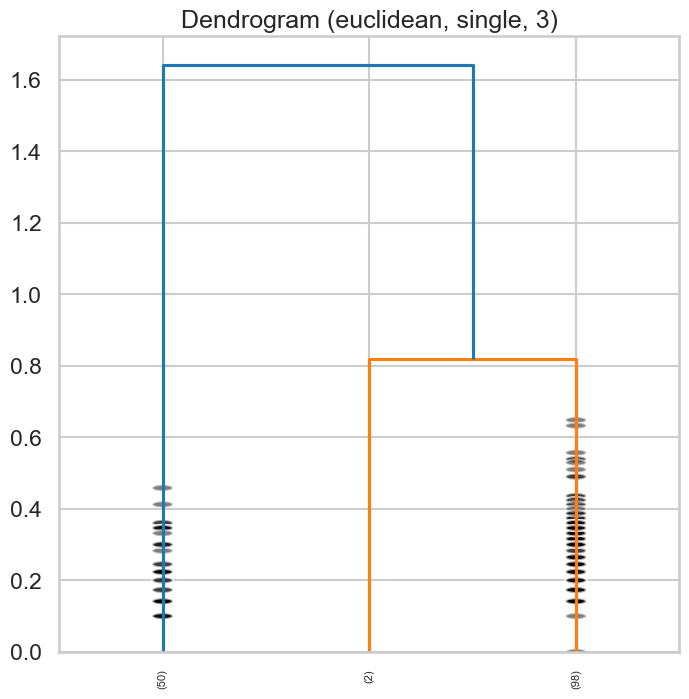

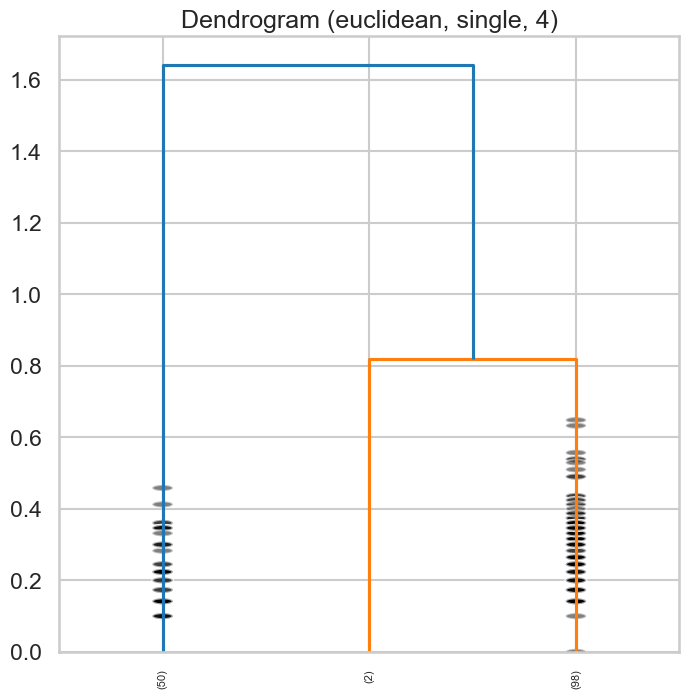

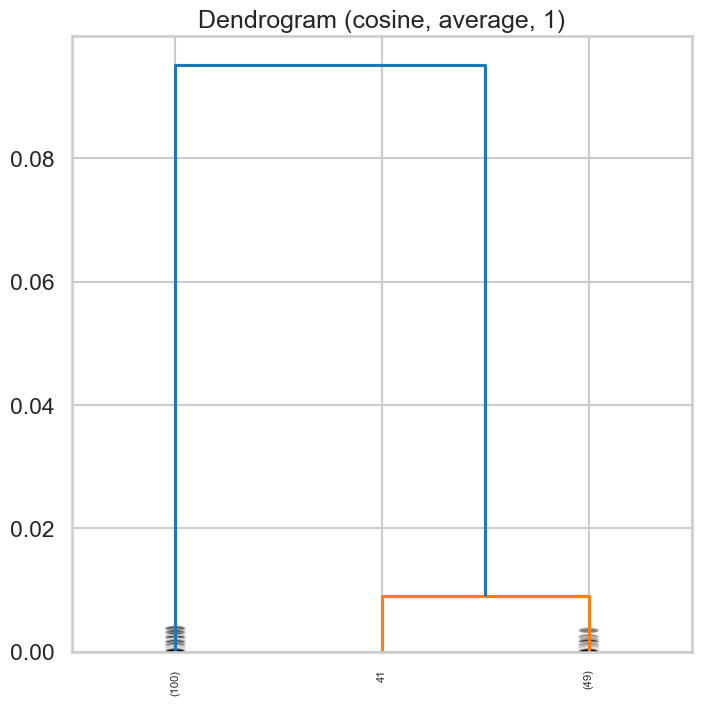

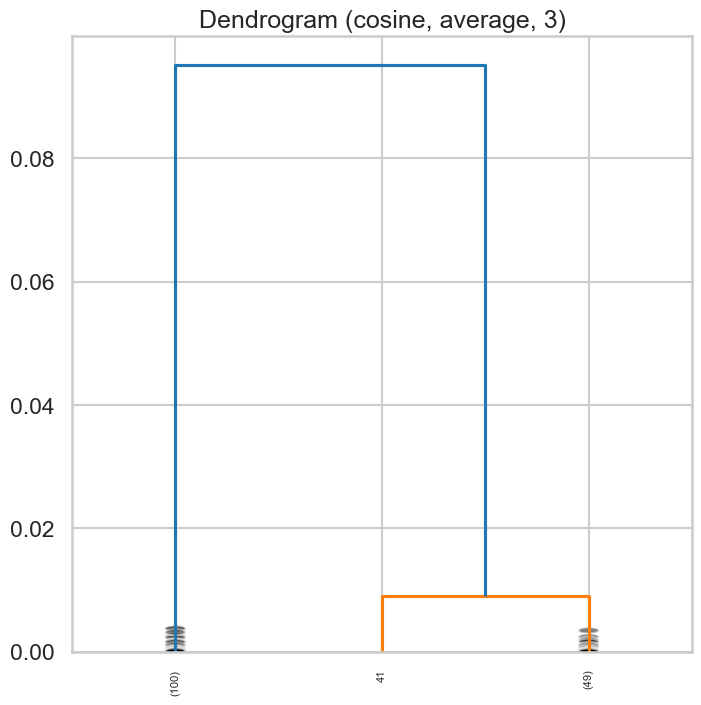

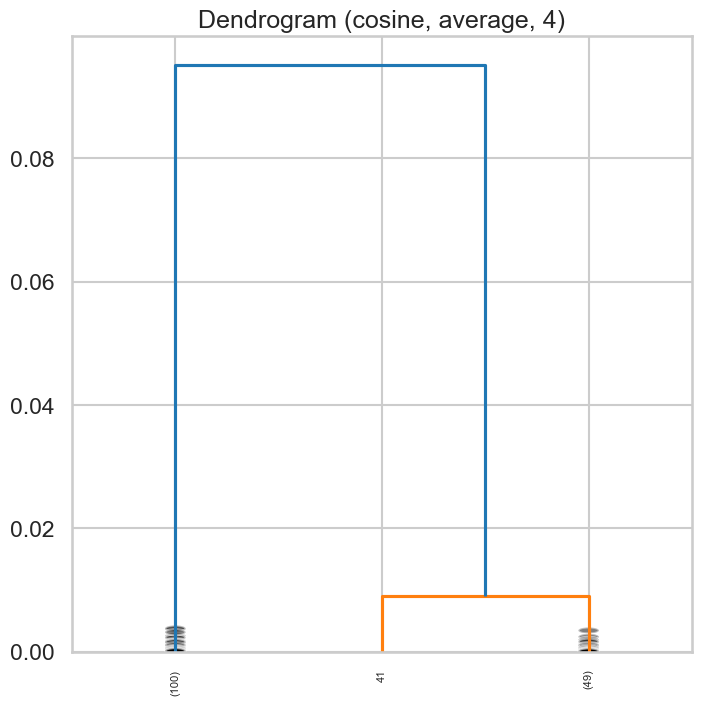

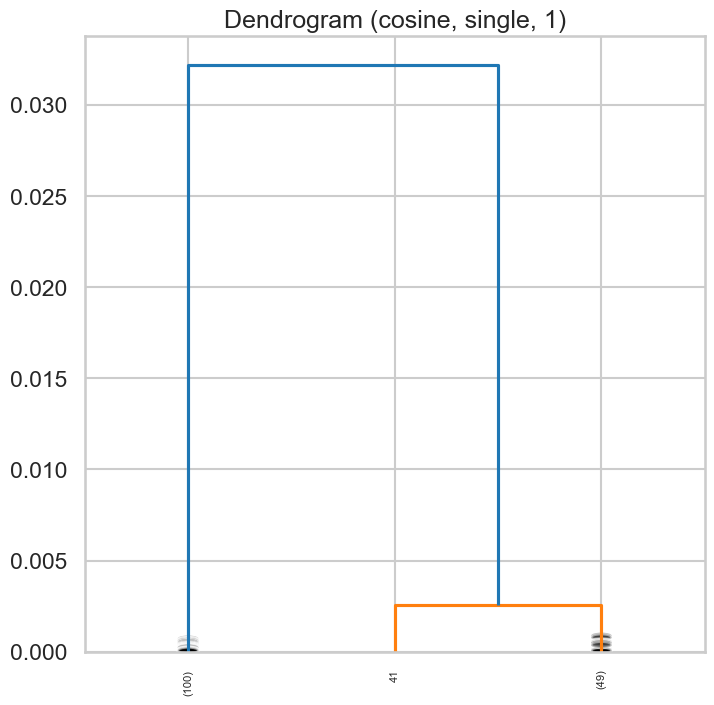

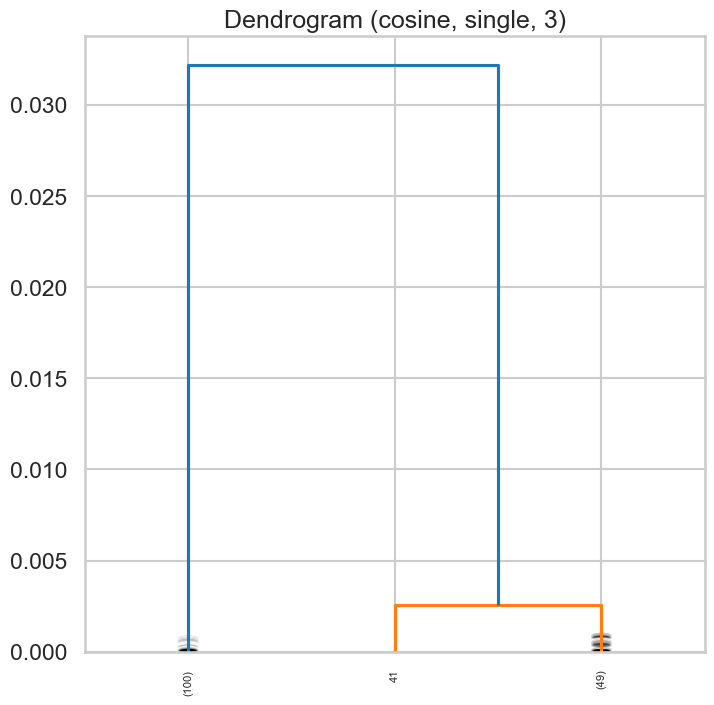

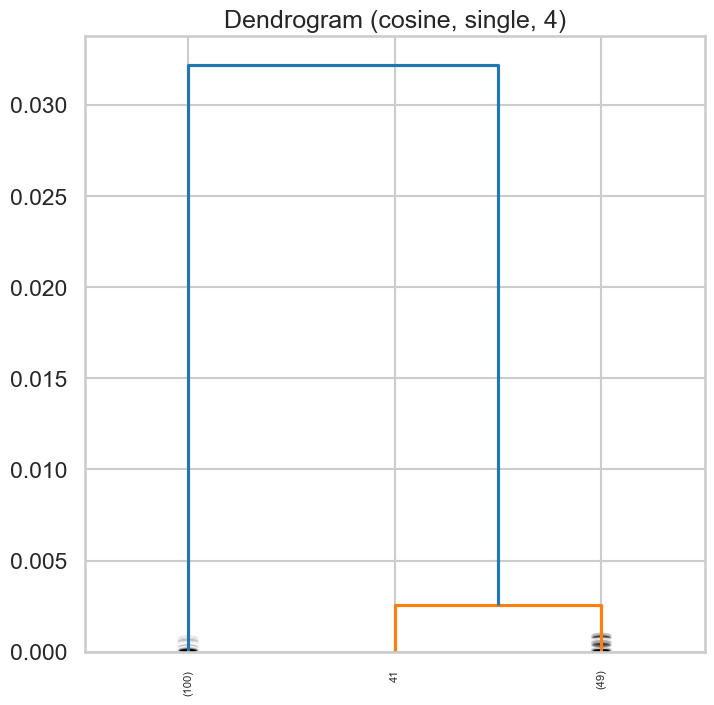

Best score: 0.6867350732769777
Best parameters: {'affinity': 'euclidean', 'linkage': 'average', 'distance_threshold': 3}


In [230]:
best_score = -1
best_params = {}

Multi_blob_Data = iris_data.data

def display_cluster1(X, model, num_clusters):
    # Get the labels
    labels = model.labels_

    # Define the colors
    colors = plt.cm.nipy_spectral(np.linspace(0, 1, num_clusters))

    # Plot the data points and color them according to their labels
    for i in range(num_clusters):
        plt.scatter(X[labels==i,0], X[labels==i,1], color=colors[i], alpha=0.5)

    plt.title(f'Agglomerative Clustering with {num_clusters} Clusters')
    plt.show()


# Loop through different parameter combinations
for affinity in ['euclidean', 'cosine']:
    for linkage_type in ['average', 'single']:
        for distance_threshold in [1, 3, 4]:
            # Create the clustering model
            model = AgglomerativeClustering(affinity=affinity, linkage=linkage_type, distance_threshold=distance_threshold, n_clusters=None)

            # Cluster the data and get the linkage matrix
            Z = linkage(Multi_blob_Data, method=linkage_type, metric=affinity)

            # Plot dendrogram
            plt.title(f"Dendrogram ({affinity}, {linkage_type}, {distance_threshold})")
            dendrogram(Z, truncate_mode='lastp', p=3, leaf_rotation=90., leaf_font_size=8., show_contracted=True)
            plt.show()

            # Calculate silhouette score
            labels = model.fit_predict(Multi_blob_Data)
            
            if len(set(labels)) > 1 and len(set(labels)) < 2000:
                score = silhouette_score(Multi_blob_Data, labels)

                # Update the best score and parameters if necessary
                if score > best_score:
                    best_score = score
                    best_params['affinity'] = affinity
                    best_params['linkage'] = linkage_type
                    best_params['distance_threshold'] = distance_threshold

                # Display the resulting clusters
                display_cluster1(np.array(Multi_blob_Data), model, len(set(labels)))

# Print the best score and parameters
print(f"Best score: {best_score}")
print(f"Best parameters: {best_params}")

### DBScan

Best parameters: eps = 0.9, min_samples = 5
Best silhouette score: 0.6867350732769777


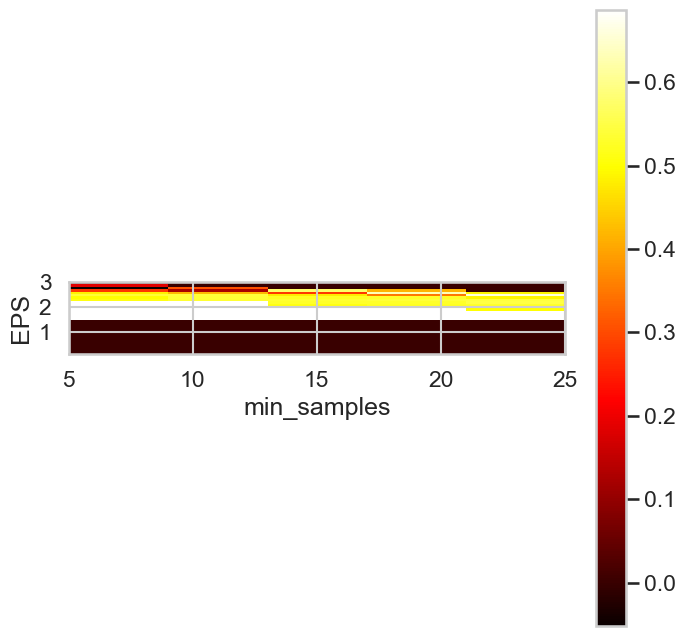

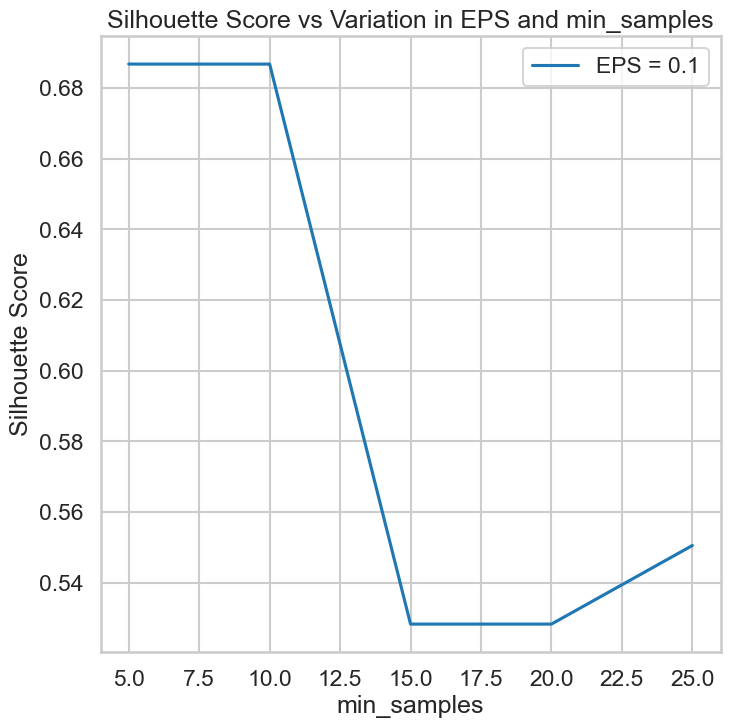

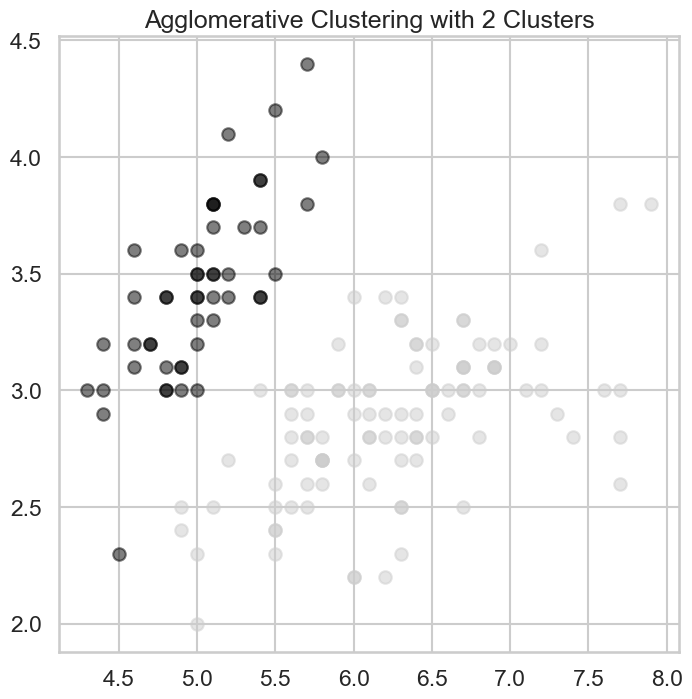

In [71]:
DBScan_method(iris_data.data)

### Normalize

In [72]:
# import module
import numpy as np

# explicit function to normalize array
def normalize_2d(matrix):
	norm = np.linalg.norm(matrix)
	matrix = matrix/norm # normalized matrix
	return matrix

# gives and array starting from -2
# and ending at 13
array = iris_data.data

# converts 1d array to a matrix
matrix = array.reshape(150,4)
# print("Simple Matrix \n", matrix)
normalized_matrix = normalize_2d(matrix)
print("\nSimple Matrix \n", normalized_matrix)



Simple Matrix 
 [[0.05221703 0.03583522 0.01433409 0.00204773]
 [0.0501693  0.0307159  0.01433409 0.00204773]
 [0.04812157 0.03276363 0.01331022 0.00204773]
 [0.04709771 0.03173976 0.01535795 0.00204773]
 [0.05119316 0.03685908 0.01433409 0.00204773]
 [0.05528862 0.03993067 0.01740568 0.00409545]
 [0.04709771 0.03481135 0.01433409 0.00307159]
 [0.05119316 0.03481135 0.01535795 0.00204773]
 [0.04504998 0.02969204 0.01433409 0.00204773]
 [0.0501693  0.03173976 0.01535795 0.00102386]
 [0.05528862 0.03788294 0.01535795 0.00204773]
 [0.04914544 0.03481135 0.01638181 0.00204773]
 [0.04914544 0.0307159  0.01433409 0.00102386]
 [0.04402612 0.0307159  0.0112625  0.00102386]
 [0.05938407 0.04095453 0.01228636 0.00204773]
 [0.05836021 0.04504998 0.01535795 0.00409545]
 [0.05528862 0.03993067 0.01331022 0.00409545]
 [0.05221703 0.03583522 0.01433409 0.00307159]
 [0.05836021 0.03890681 0.01740568 0.00307159]
 [0.05221703 0.03890681 0.01535795 0.00307159]
 [0.05528862 0.03481135 0.01740568 0.002047

### Kmeans

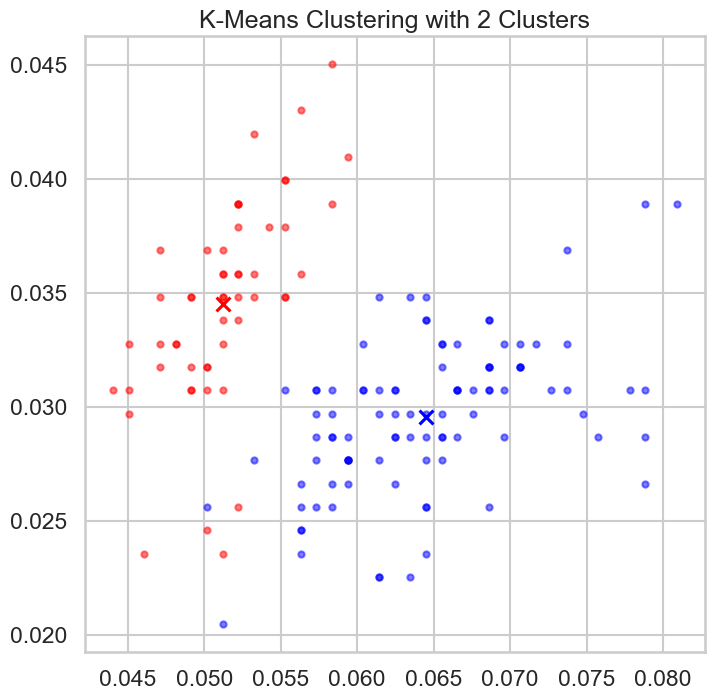

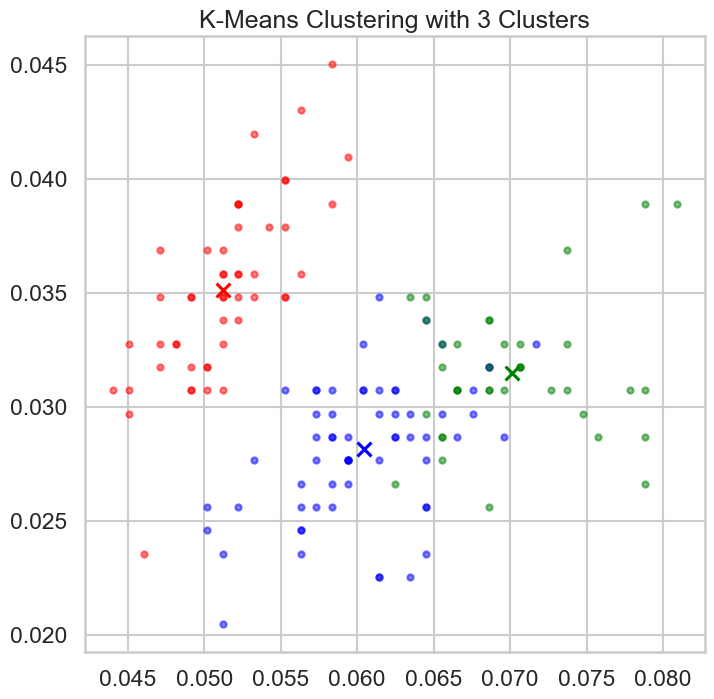

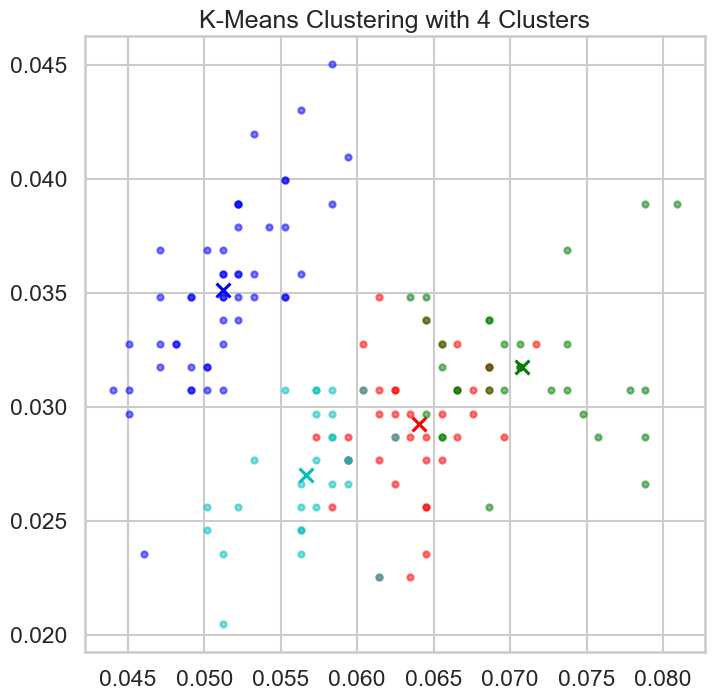

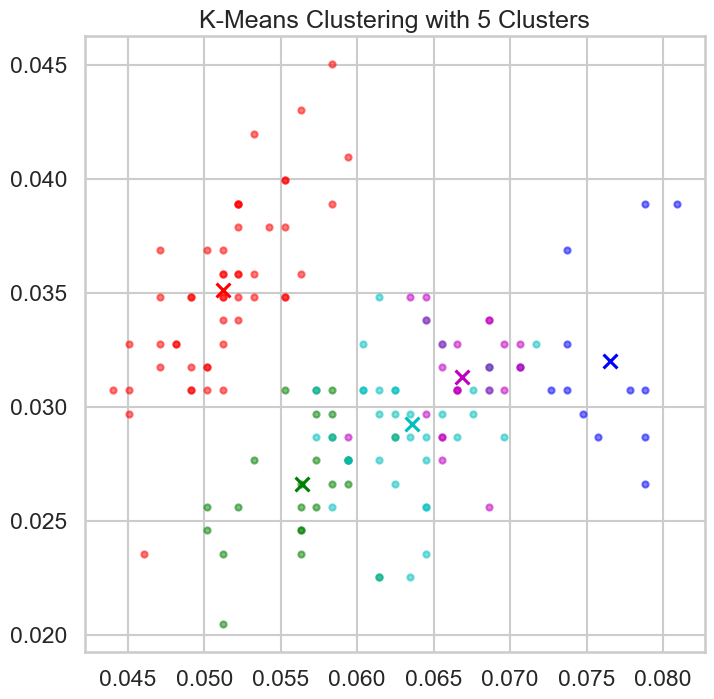

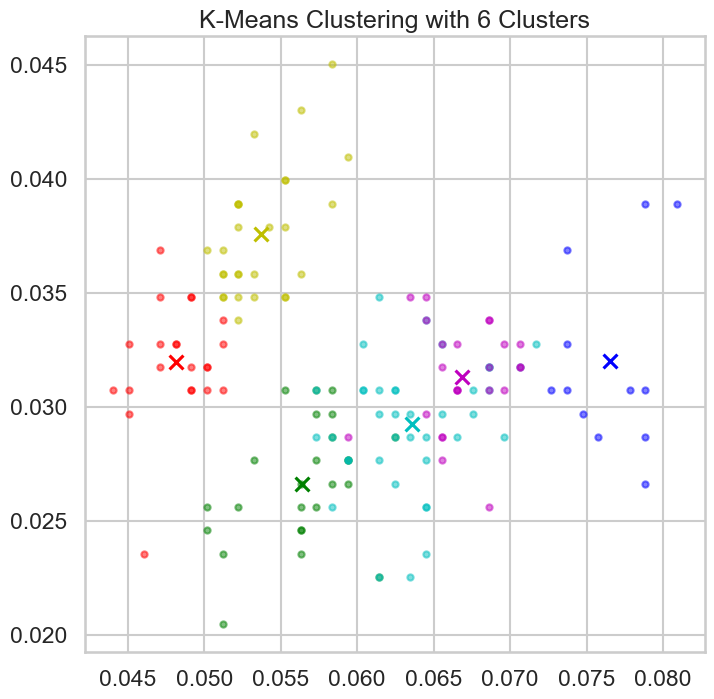

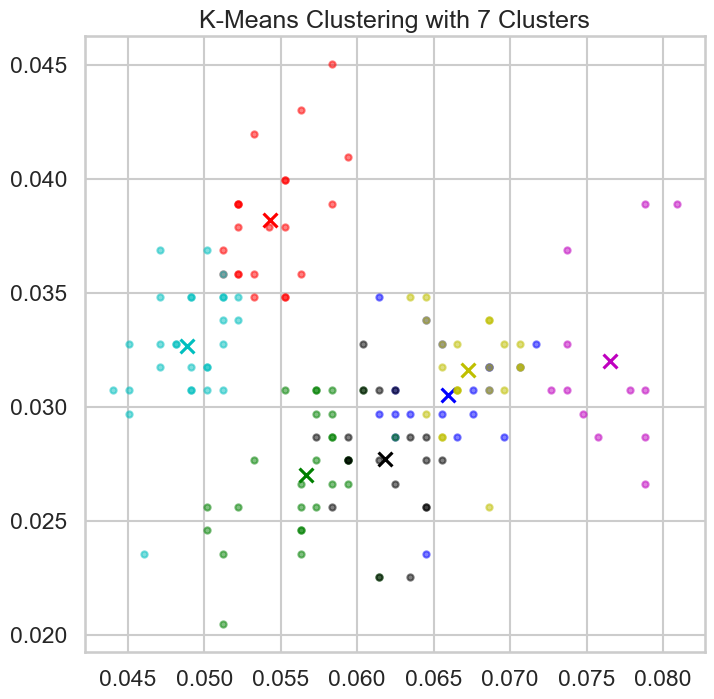

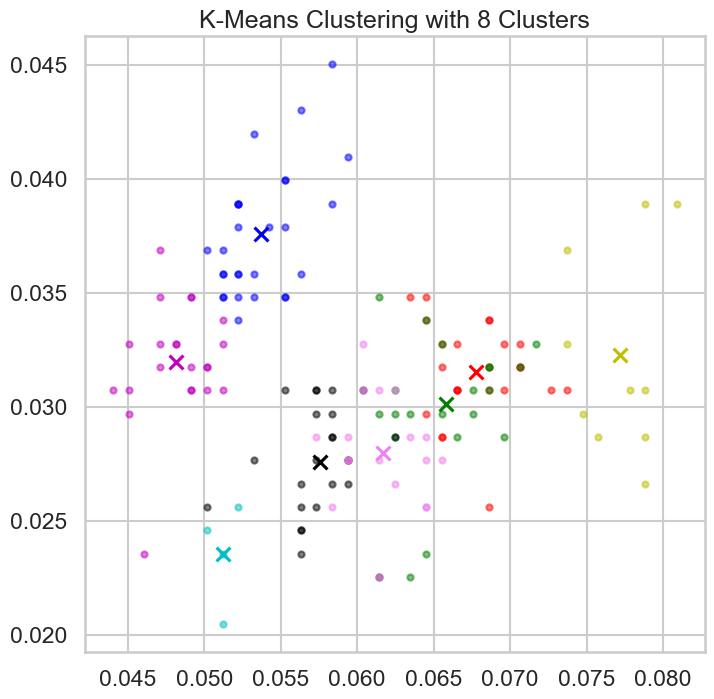

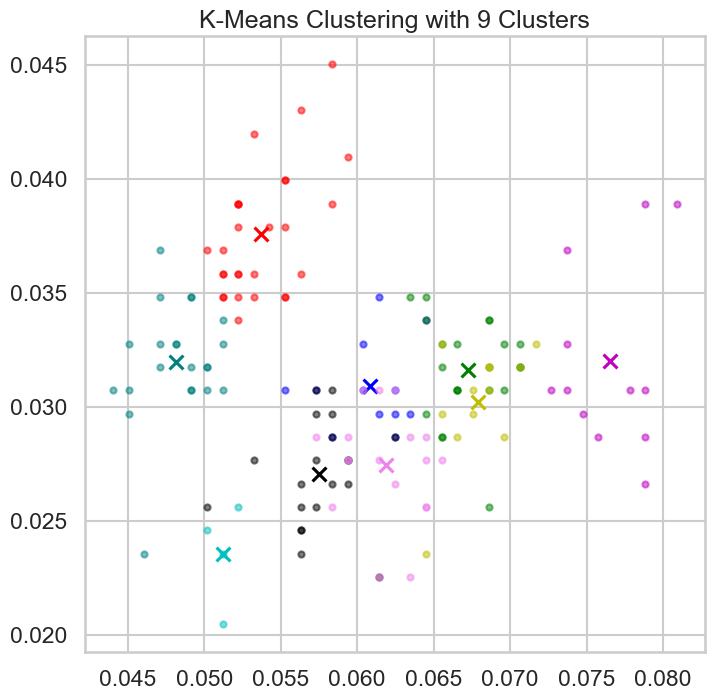

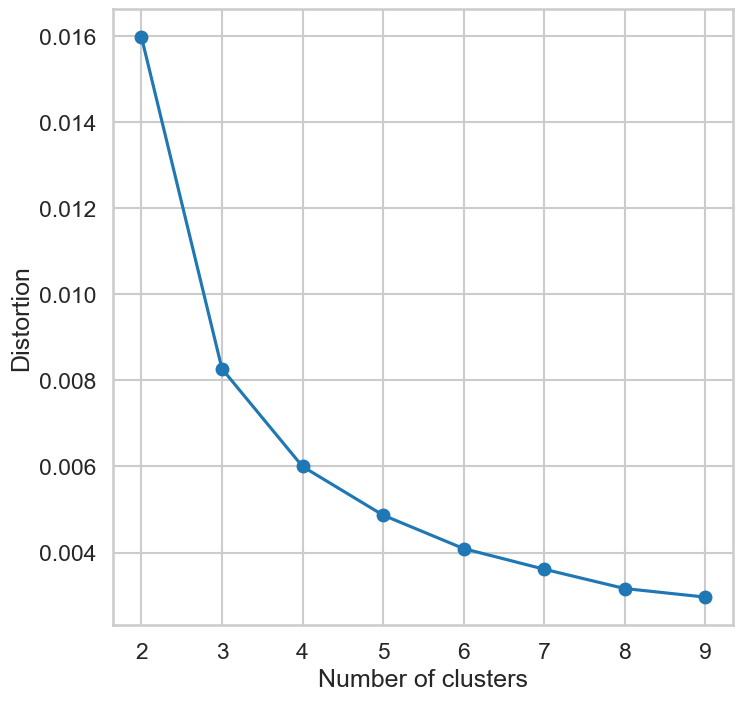

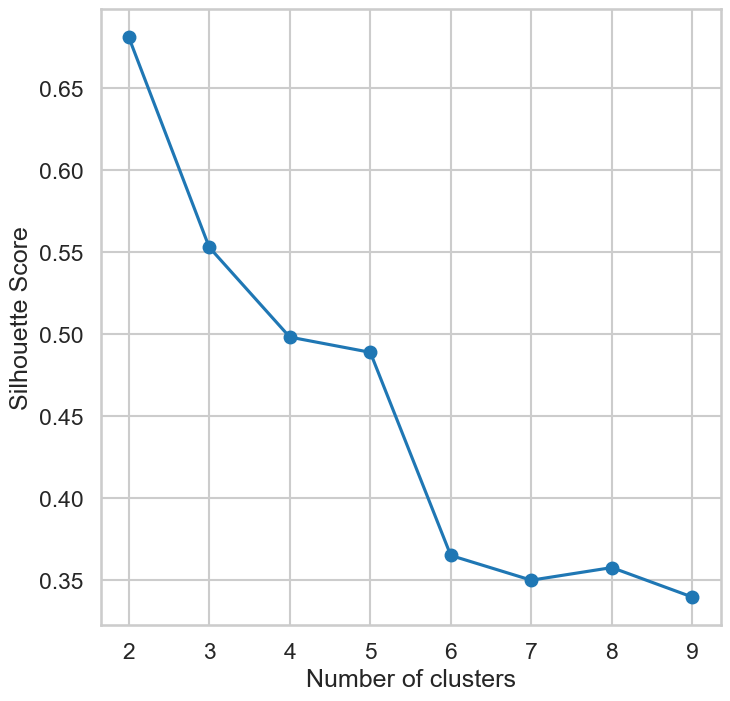

In [80]:
K_mean_method(normalized_matrix)


### Hierarchal Clustering 

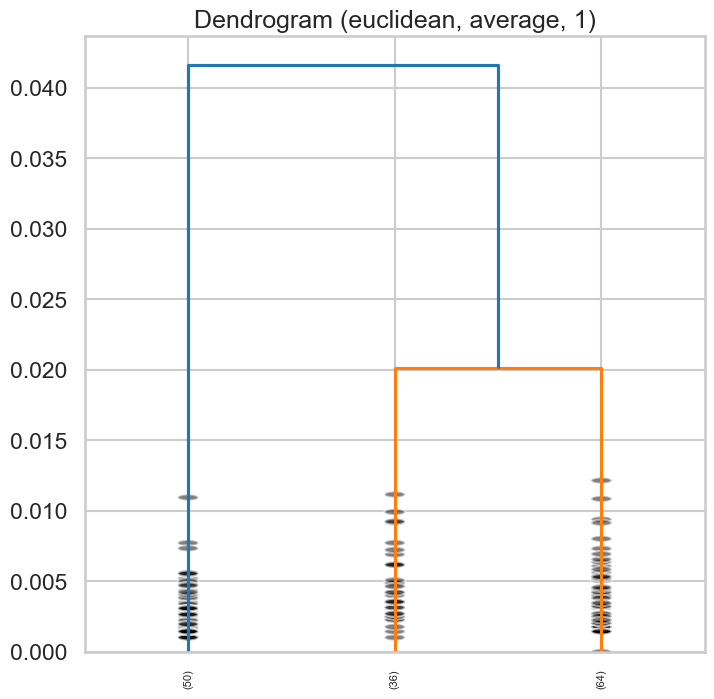

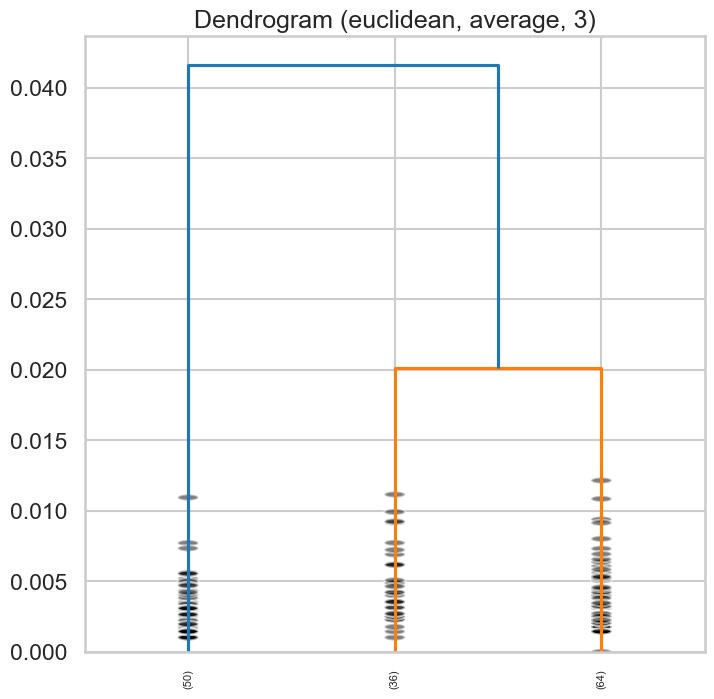

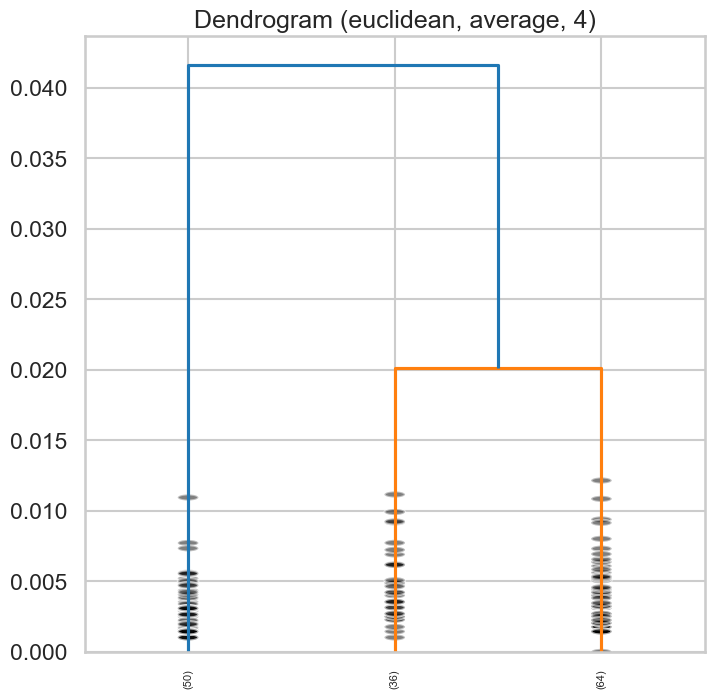

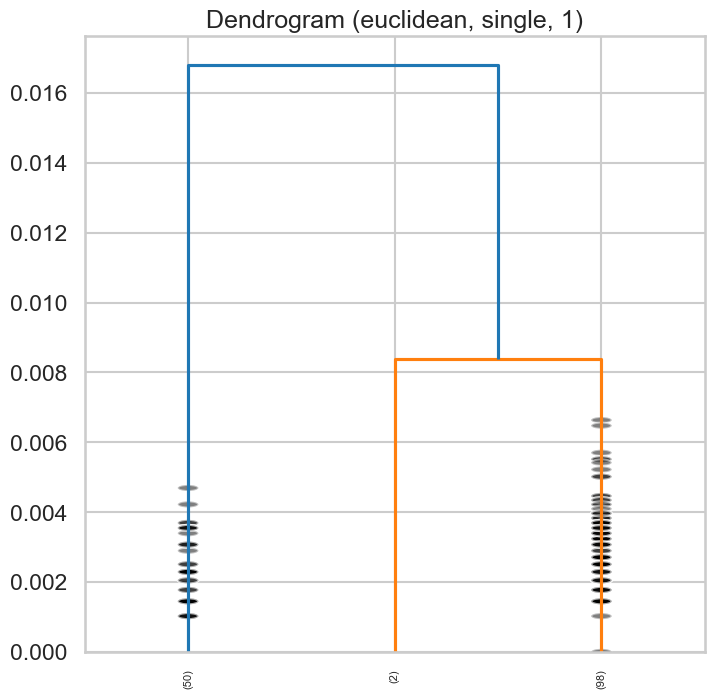

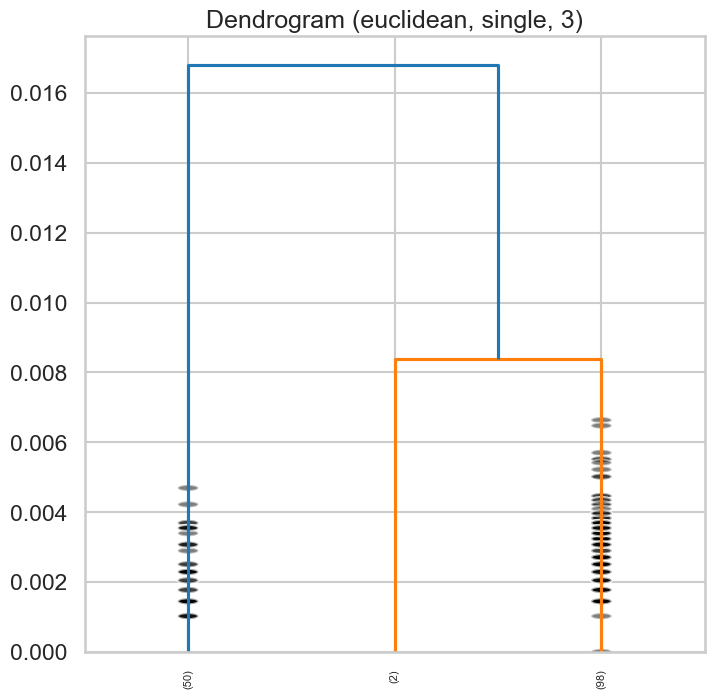

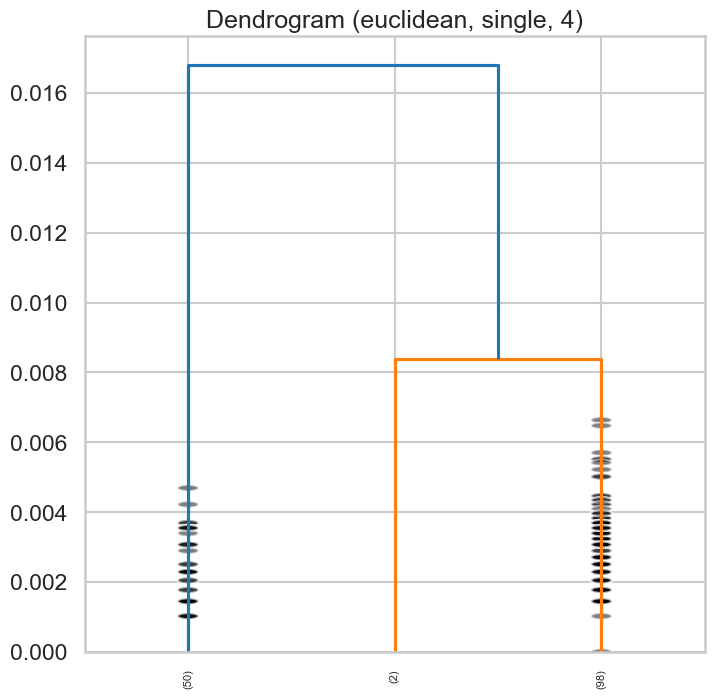

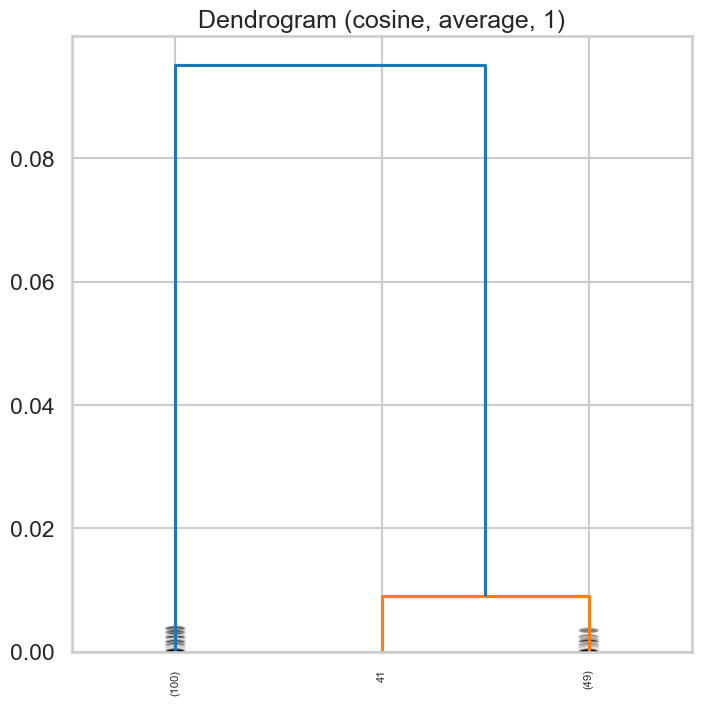

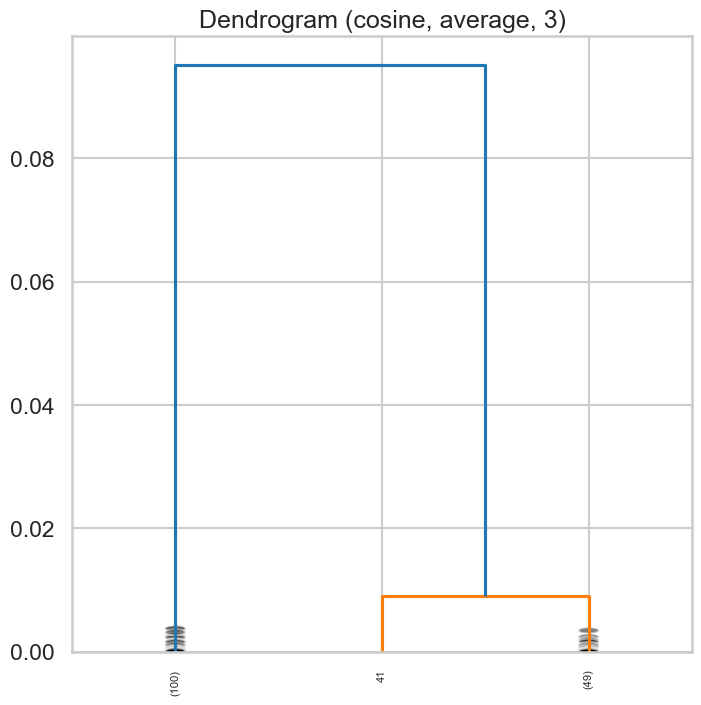

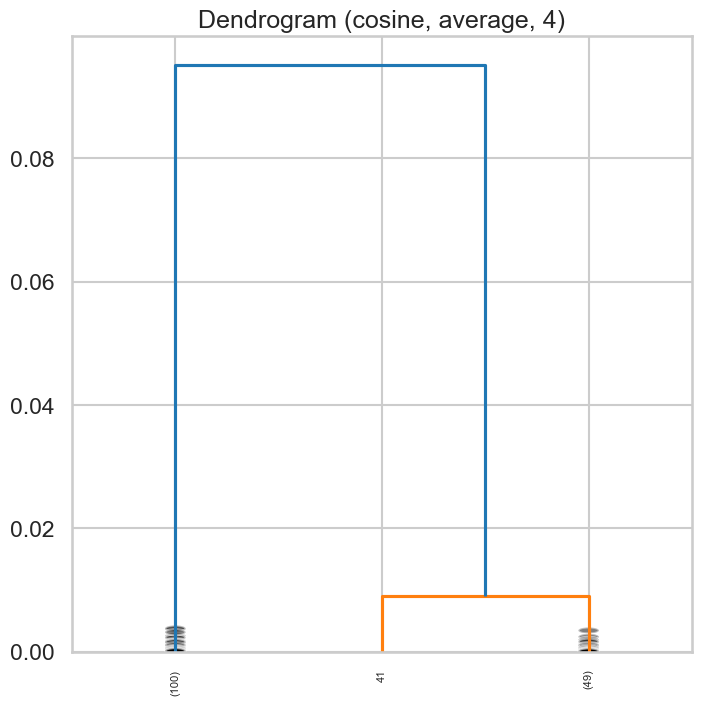

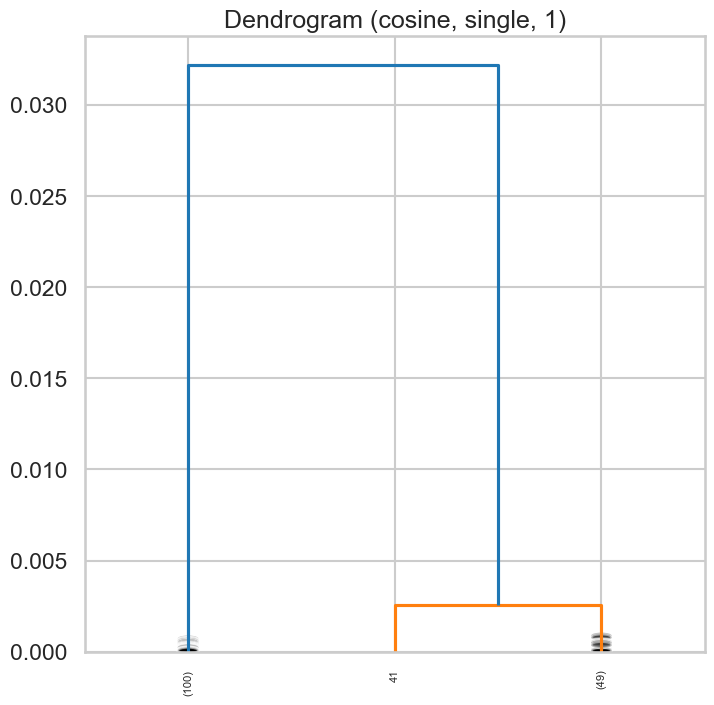

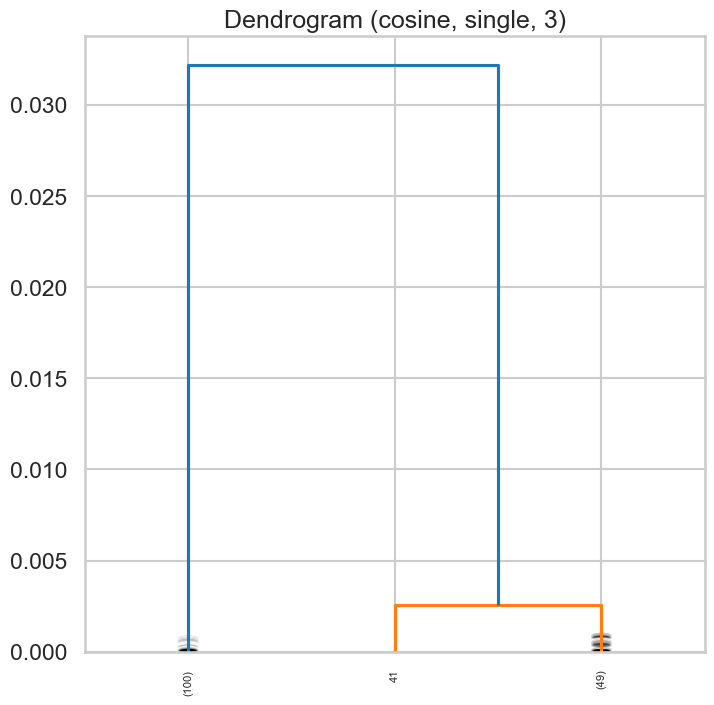

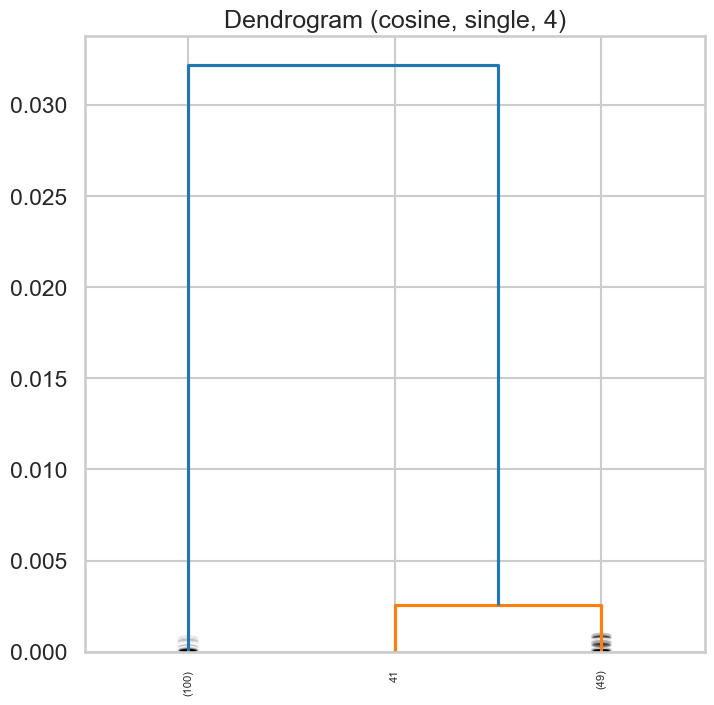

Best score: -1
Best parameters: {}


In [243]:
best_score = -1
best_params = {}

Multi_blob_Data = normalized_matrix

def display_cluster1(X, model, num_clusters):
    # Get the labels
    labels = model.labels_

    # Define the colors
    colors = plt.cm.nipy_spectral(np.linspace(0, 1, num_clusters))

    # Plot the data points and color them according to their labels
    for i in range(num_clusters):
        plt.scatter(X[labels==i,0], X[labels==i,1], color=colors[i], alpha=0.5)

    plt.title(f'Agglomerative Clustering with {num_clusters} Clusters')
    plt.show()


# Loop through different parameter combinations
for affinity in ['euclidean', 'cosine']:
    for linkage_type in ['average', 'single']:
        for distance_threshold in [1, 3, 4]:
            # Create the clustering model
            model = AgglomerativeClustering(affinity=affinity, linkage=linkage_type, distance_threshold=distance_threshold, n_clusters=None)

            # Cluster the data and get the linkage matrix
            Z = linkage(Multi_blob_Data, method=linkage_type, metric=affinity)

            # Plot dendrogram
            plt.title(f"Dendrogram ({affinity}, {linkage_type}, {distance_threshold})")
            dendrogram(Z, truncate_mode='lastp', p=3, leaf_rotation=90., leaf_font_size=8., show_contracted=True)
            plt.show()

            # Calculate silhouette score
            labels = model.fit_predict(Multi_blob_Data)
            
            if len(set(labels)) > 1 and len(set(labels)) < 2000:
                score = silhouette_score(Multi_blob_Data, labels)

                # Update the best score and parameters if necessary
                if score > best_score:
                    best_score = score
                    best_params['affinity'] = affinity
                    best_params['linkage'] = linkage_type
                    best_params['distance_threshold'] = distance_threshold

                # Display the resulting clusters
                display_cluster1(np.array(Multi_blob_Data), model, len(set(labels)))

# Print the best score and parameters
print(f"Best score: {best_score}")
print(f"Best parameters: {best_params}")

### DBScan

Best parameters: eps = 0, min_samples = 0
Best silhouette score: 0


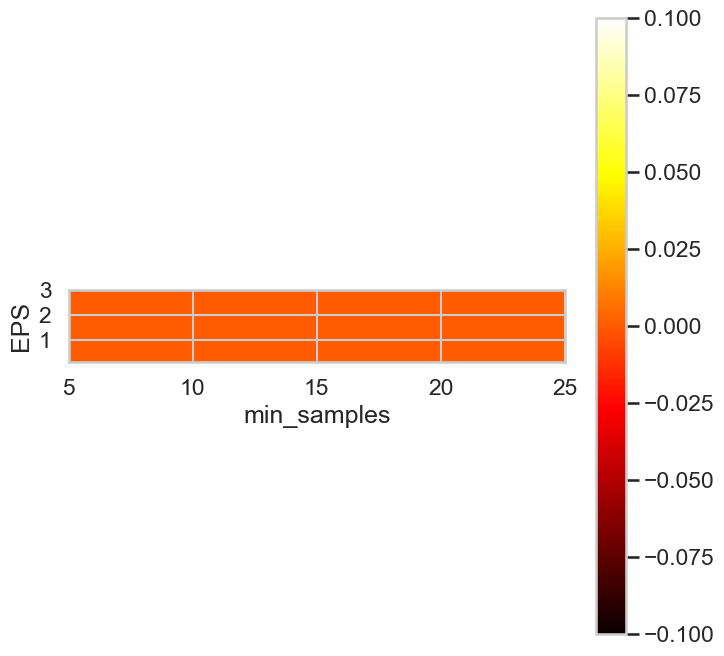

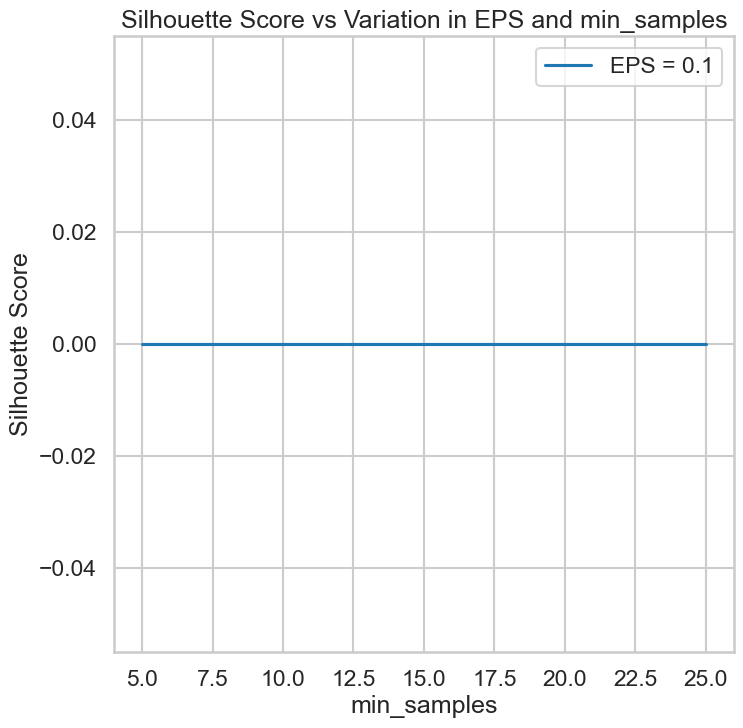

In [73]:
DBScan_method(normalized_matrix)

## Customer dataset
Repeat all the above on the customer data set 

In [74]:
df = pd.read_csv("E://University/Semester 10/Machine Learning (NETW1013)/Assignments/Assignment 1/Customer data.csv", index_col=0)
Multi_blob_Data = df

### Kmeans

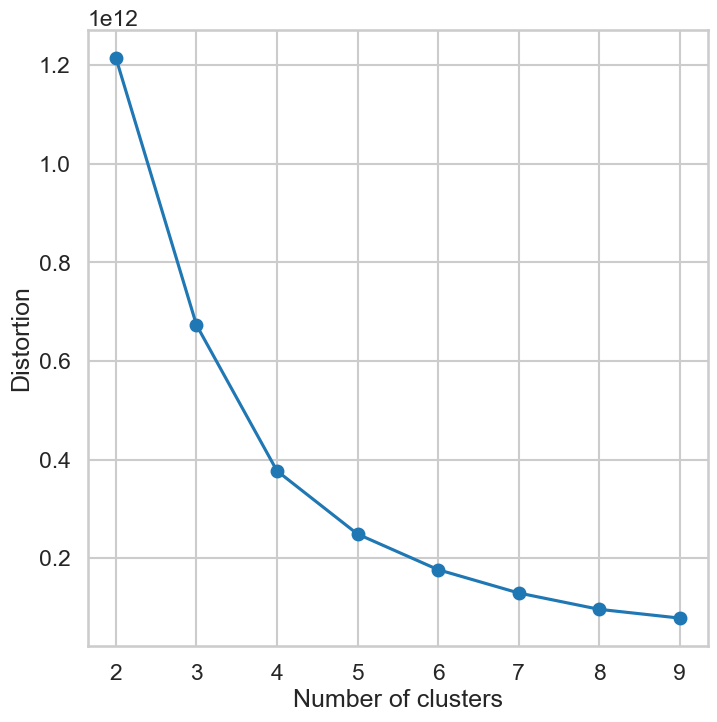

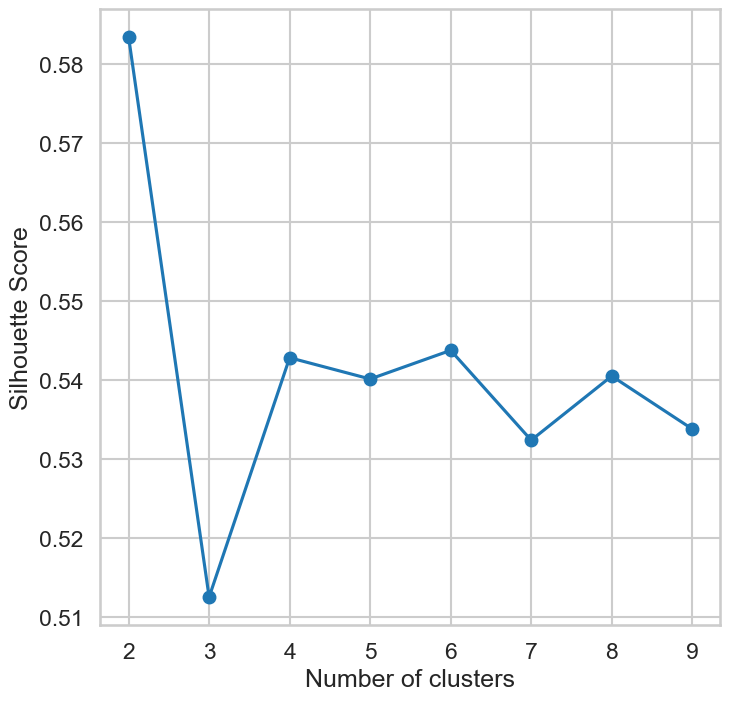

In [84]:
Multi_blob_Data = df[['Age', 'Income', 'Settlement size']]

distortions = []
sil_scores = []
for k in range(2, 10):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(Multi_blob_Data)
    distortions.append(km.inertia_)
    sil_scores.append(silhouette_score(Multi_blob_Data, km.labels_))
    # display_cluster(Multi_blob_Data, km, k)

# plot elbow graph to visualize the optimal number of clusters
plt.plot(range(2, 10), distortions, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.show()

# plot silhouette score graph to visualize the optimal number of clusters
plt.plot(range(2, 10), sil_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()


### Hierarchal Clustering 

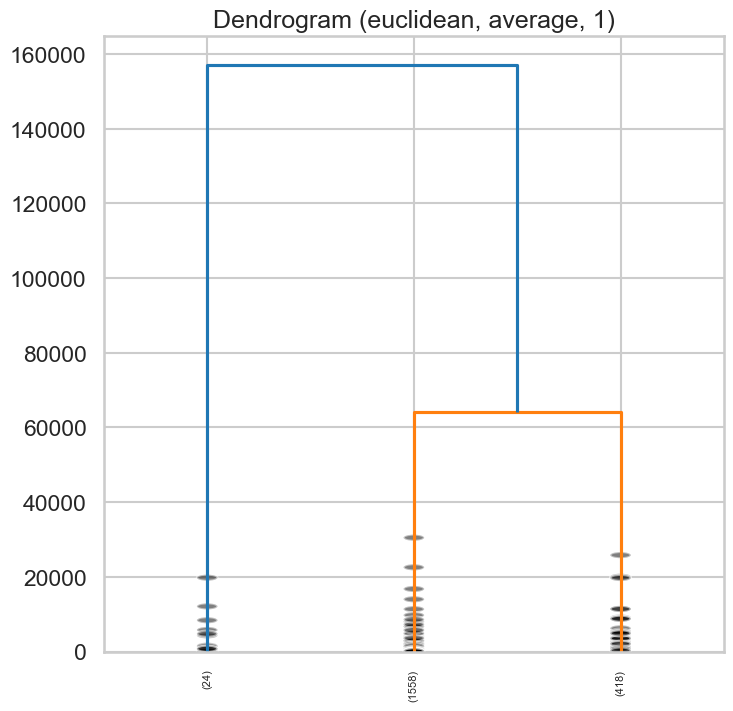

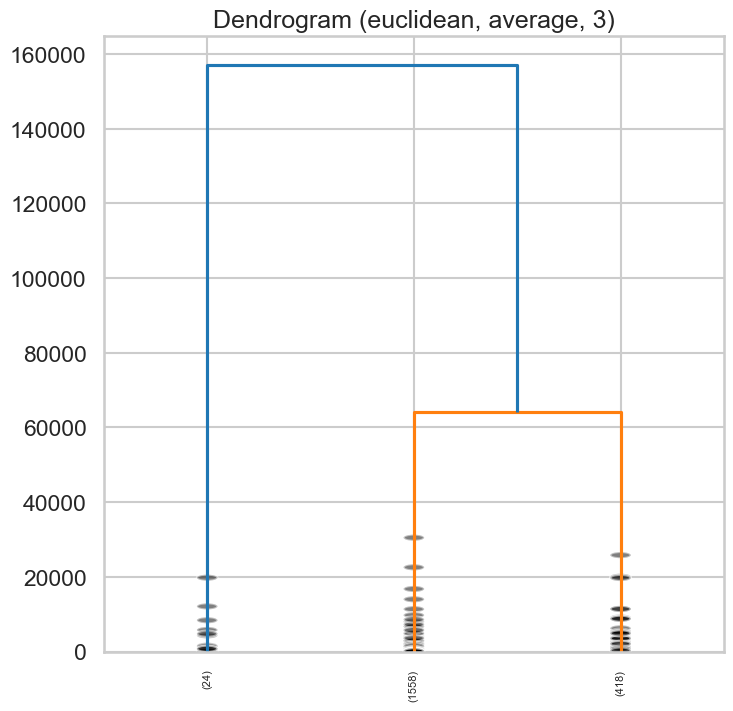

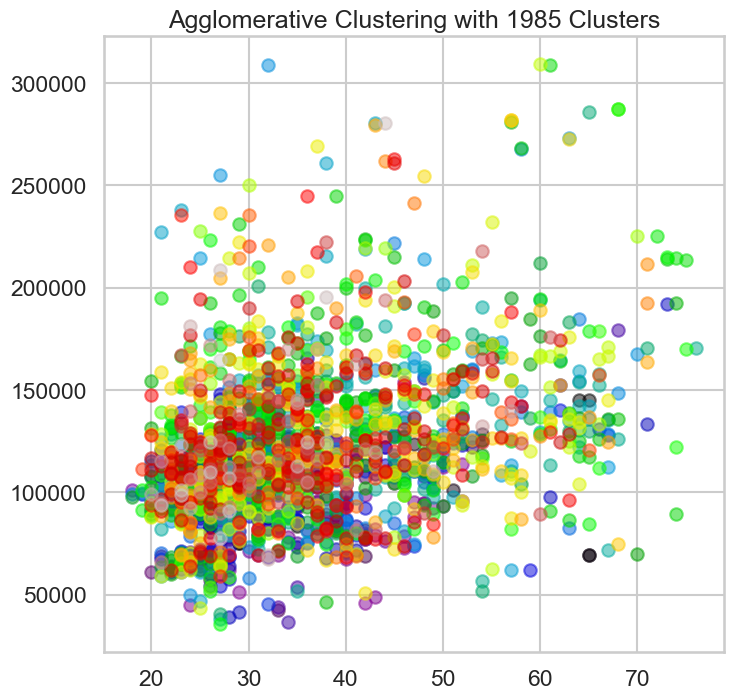

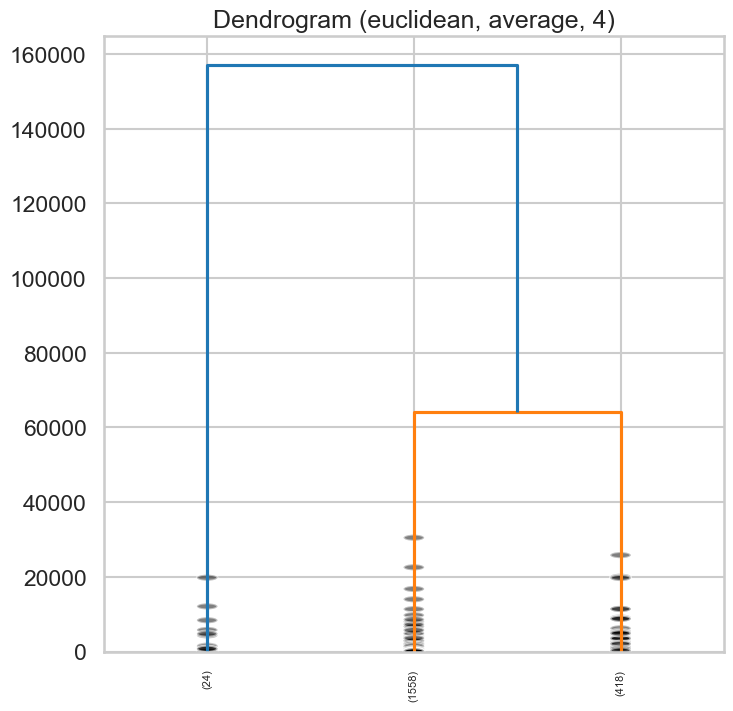

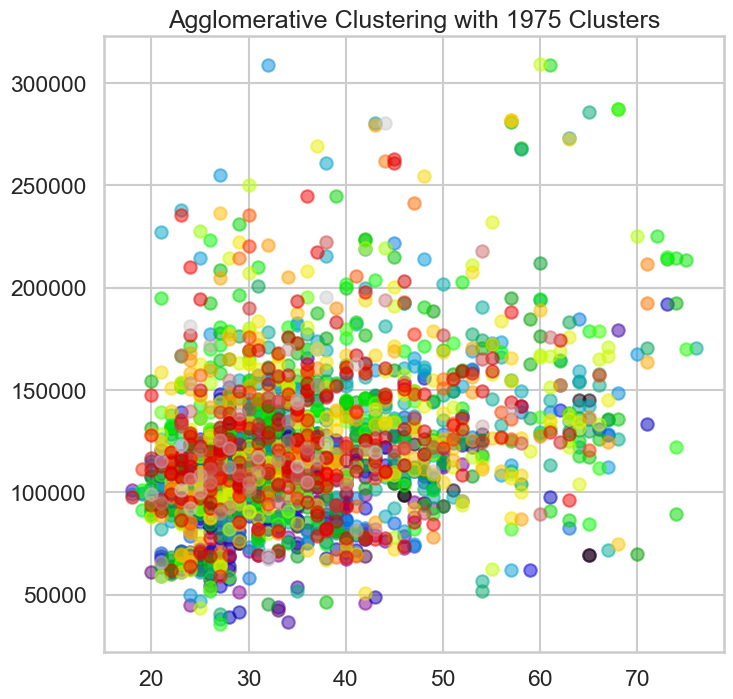

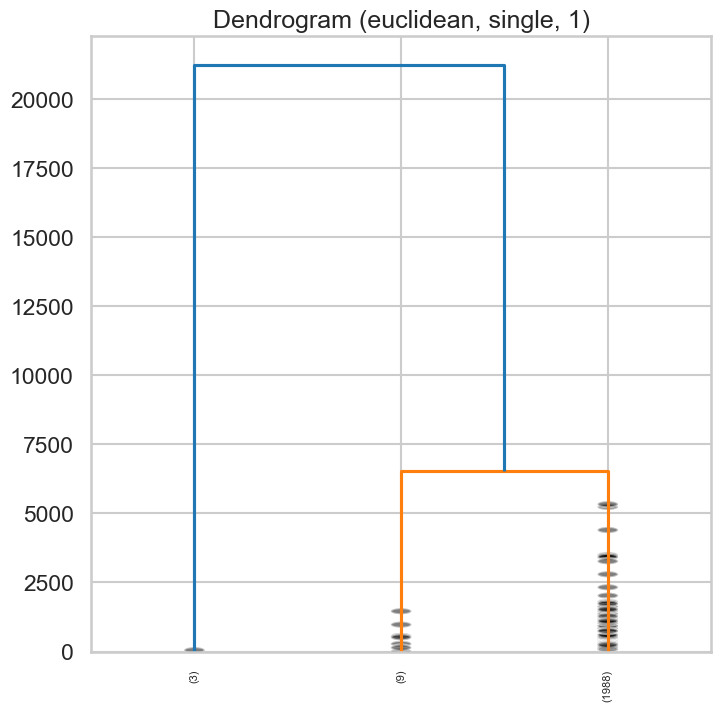

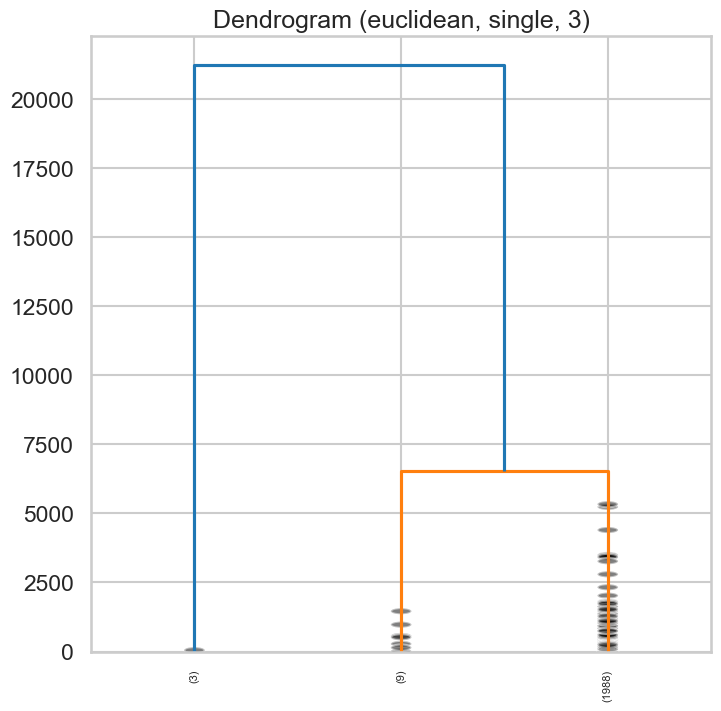

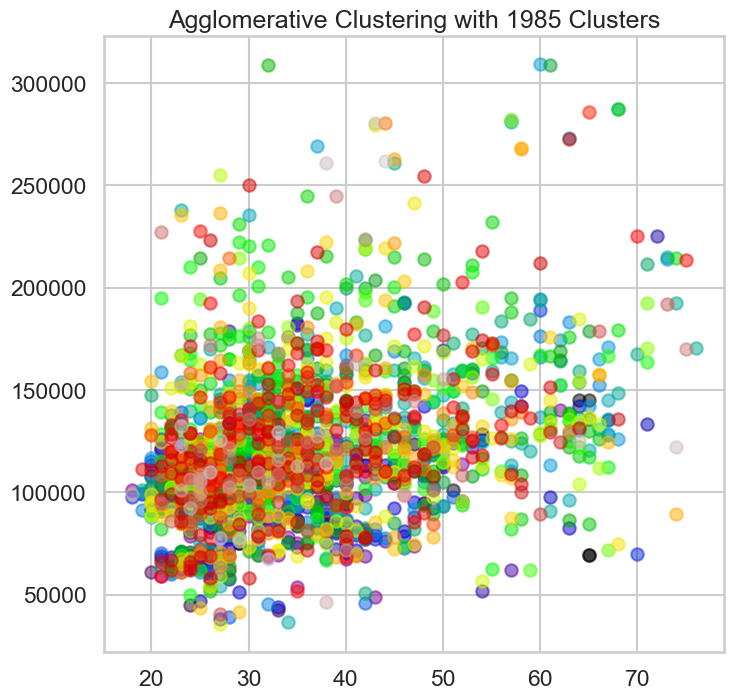

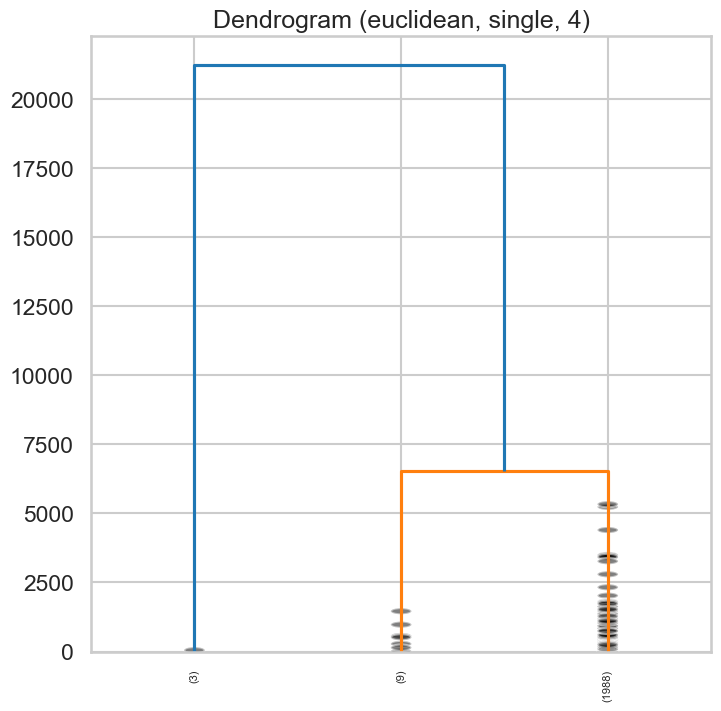

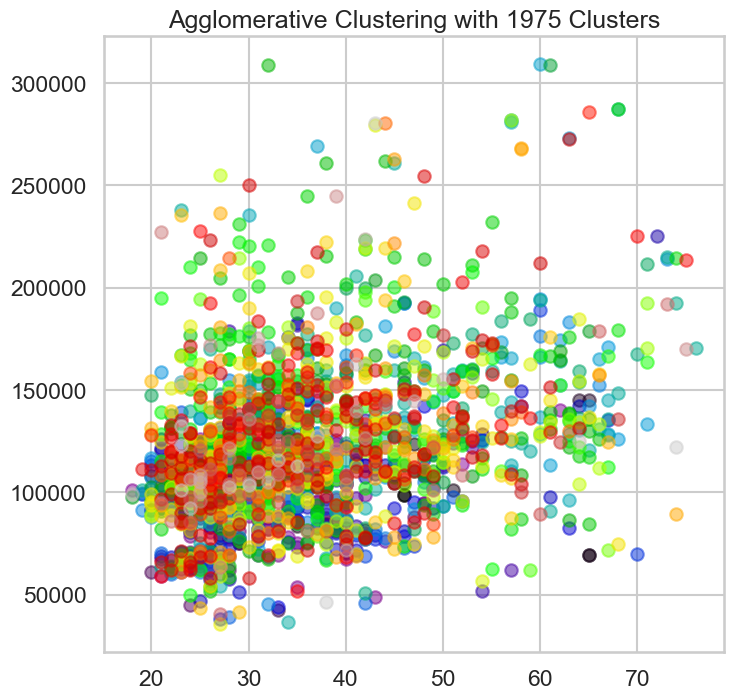

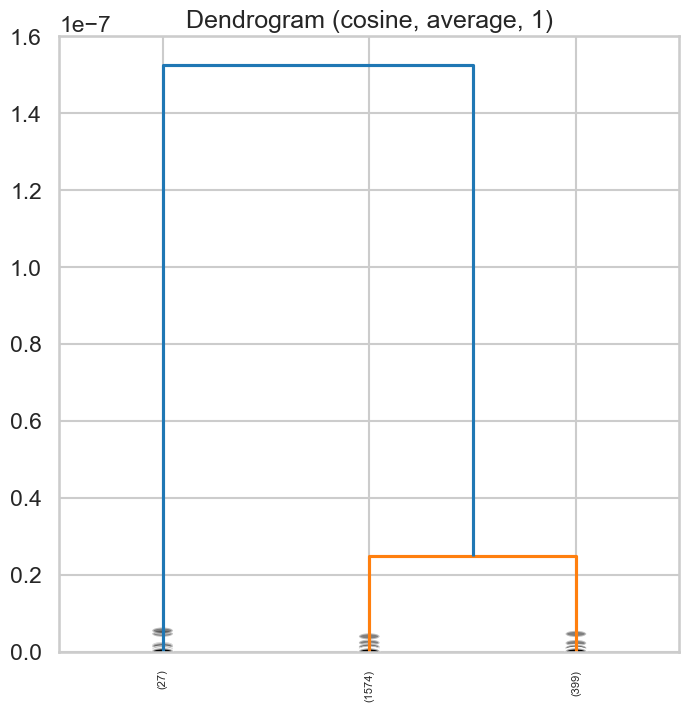

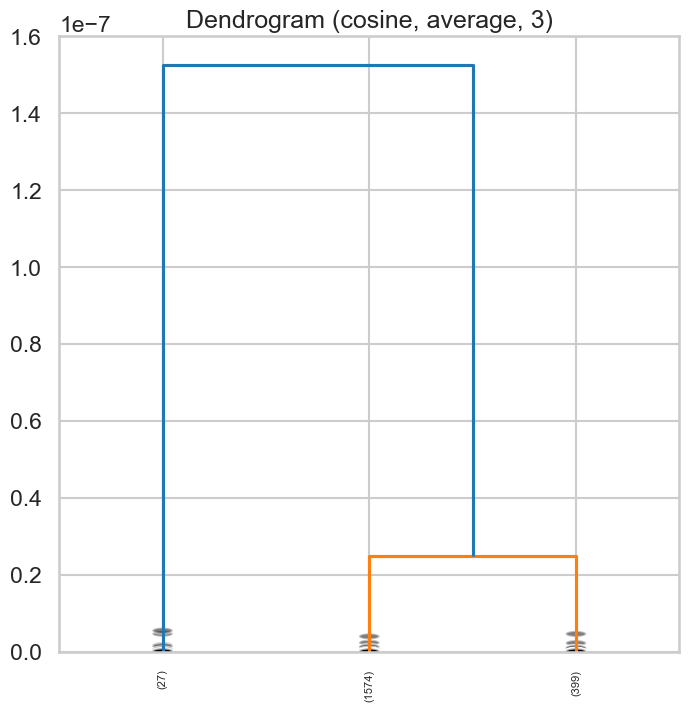

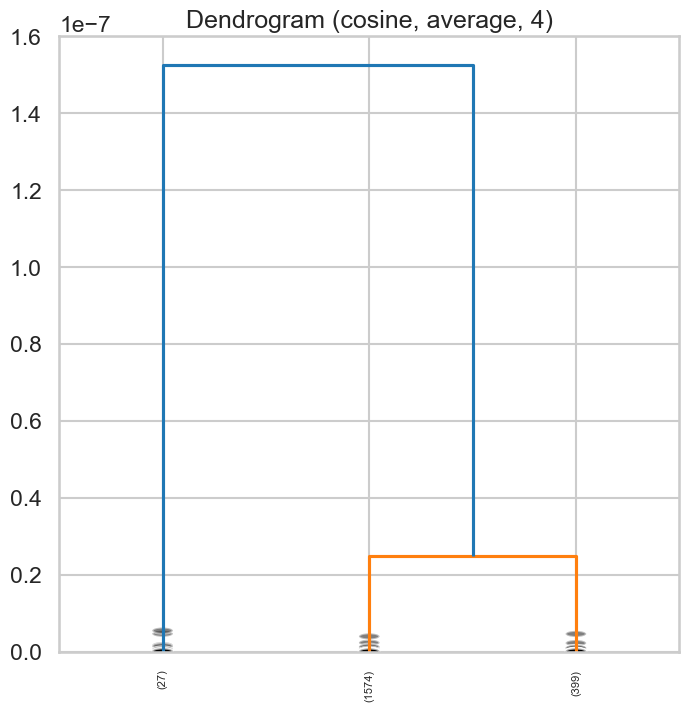

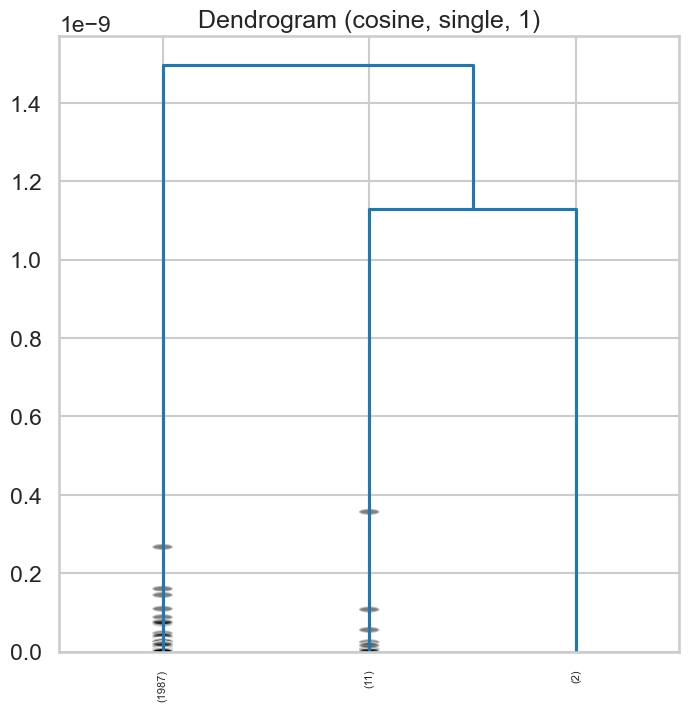

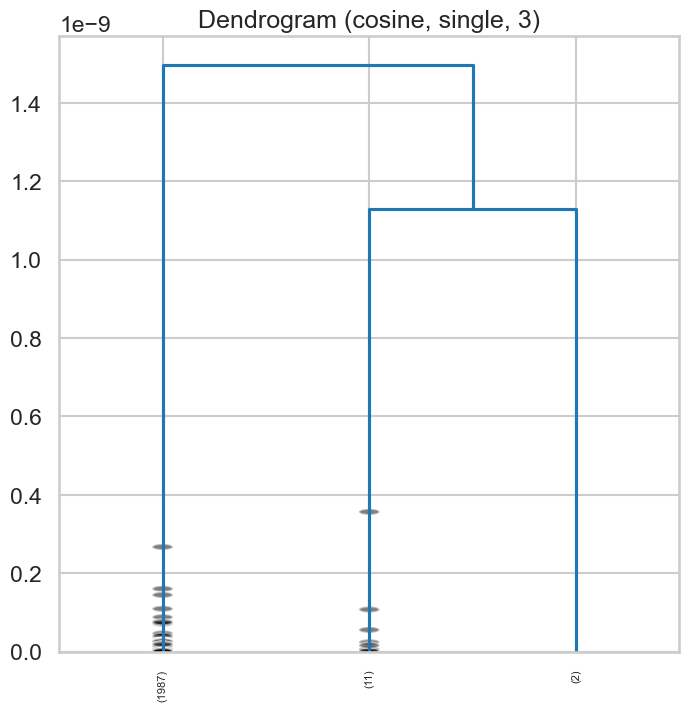

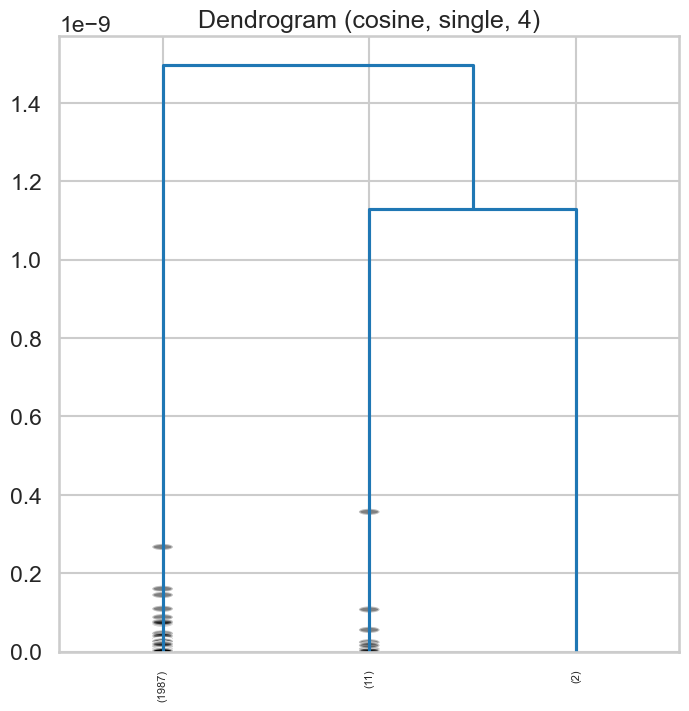

Best score: 0.020712007621487255
Best parameters: {'affinity': 'euclidean', 'linkage': 'average', 'distance_threshold': 4}


In [167]:
best_score = -1
best_params = {}

Multi_blob_Data = df[['Age', 'Income', 'Settlement size']]

def display_cluster1(X, model, num_clusters):
    # Get the labels
    labels = model.labels_

    # Define the colors
    colors = plt.cm.nipy_spectral(np.linspace(0, 1, num_clusters))

    # Plot the data points and color them according to their labels
    for i in range(num_clusters):
        plt.scatter(X[labels==i,0], X[labels==i,1], color=colors[i], alpha=0.5)

    plt.title(f'Agglomerative Clustering with {num_clusters} Clusters')
    plt.show()


# Loop through different parameter combinations
for affinity in ['euclidean', 'cosine']:
    for linkage_type in ['average', 'single']:
        for distance_threshold in [1, 3, 4]:
            # Create the clustering model
            model = AgglomerativeClustering(affinity=affinity, linkage=linkage_type, distance_threshold=distance_threshold, n_clusters=None)

            # Cluster the data and get the linkage matrix
            Z = linkage(Multi_blob_Data, method=linkage_type, metric=affinity)

            # Plot dendrogram
            plt.title(f"Dendrogram ({affinity}, {linkage_type}, {distance_threshold})")
            dendrogram(Z, truncate_mode='lastp', p=3, leaf_rotation=90., leaf_font_size=8., show_contracted=True)
            plt.show()

            # Calculate silhouette score
            labels = model.fit_predict(Multi_blob_Data)
            
            if len(set(labels)) > 1 and len(set(labels)) < 2000:
                score = silhouette_score(Multi_blob_Data, labels)

                # Update the best score and parameters if necessary
                if score > best_score:
                    best_score = score
                    best_params['affinity'] = affinity
                    best_params['linkage'] = linkage_type
                    best_params['distance_threshold'] = distance_threshold

                # Display the resulting clusters
                display_cluster1(np.array(Multi_blob_Data), model, len(set(labels)))

# Print the best score and parameters
print(f"Best score: {best_score}")
print(f"Best parameters: {best_params}")

### DBScan

Best parameters: eps = 0, min_samples = 0
Best silhouette score: 0


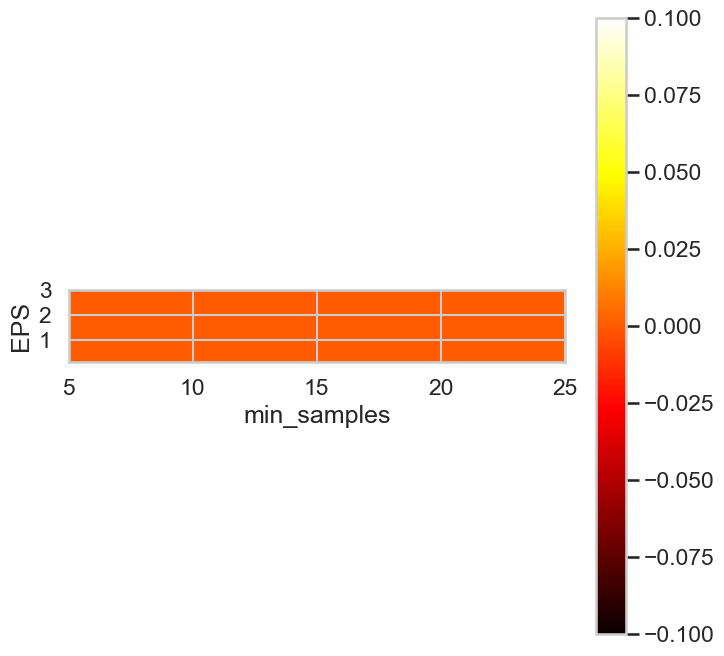

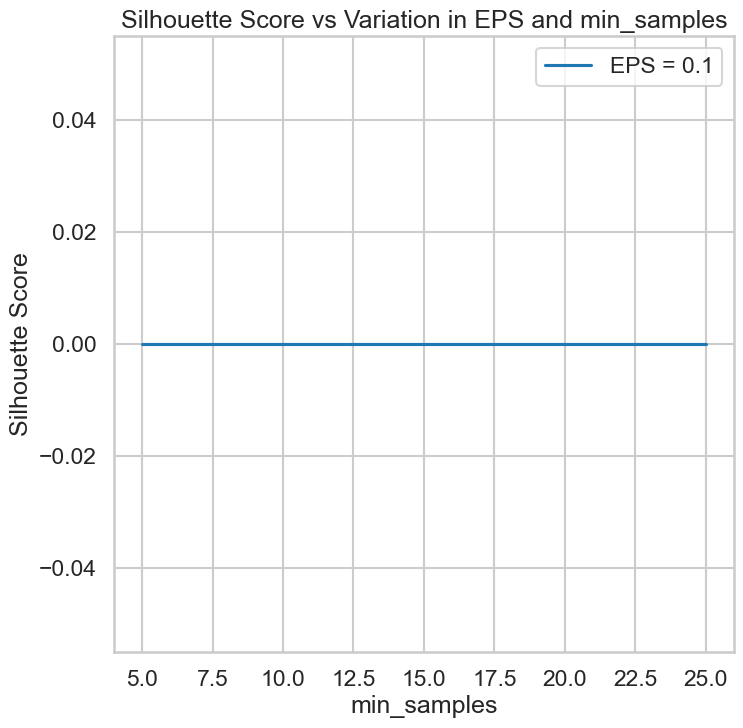

In [75]:
DBScan_method(df[['Age', 'Income', 'Settlement size']])

### Gaussian Mixture

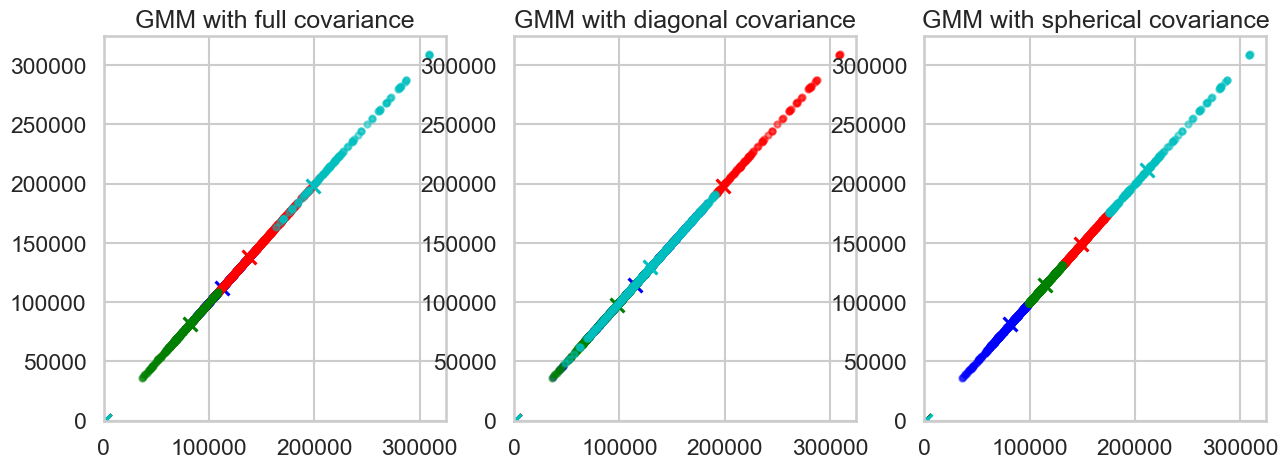

In [206]:
Multi_blob_Data = df[['Age', 'Income']]

# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X, km=None, gmm=None, num_clusters=0, ax=None):
    color = 'brgcmyk'  # List colors
    alpha = 0.5  # color opacity
    s = 20
    if ax is None:
        ax = plt.gca()
    if num_clusters == 0:
        ax.scatter(X[:, 0], X[:, 1], c=color[0], alpha=alpha, s=s)
    elif km is not None:
        for i in range(num_clusters):
            ax.scatter(X[km.predict(X)==i, 0], X[km.predict(X)==i, 1], c=color[i], alpha=alpha, s=s)
            ax.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], c=color[i], marker='x', s=100)
    elif gmm is not None:
        for i in range(num_clusters):
            ax.scatter(X[gmm.predict(X)==i], X[gmm.predict(X)==i], c=color[i], alpha=alpha, s=s)
            ax.scatter(gmm.means_[i], gmm.means_[i], c=color[i], marker='x', s=100)



# Use GaussianMixture function to cluster the data
gmm = GaussianMixture(n_components=4)
gmm.fit(Multi_blob_Data)

# In GMM change the covariance_type and check the difference in the resulting probability fit 
gmm_diag = GaussianMixture(n_components=4, covariance_type='diag')
gmm_diag.fit(Multi_blob_Data)

gmm_spherical = GaussianMixture(n_components=4, covariance_type='spherical')
gmm_spherical.fit(Multi_blob_Data)

# Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot GMM with full covariance type
ax[0].set_title("GMM with full covariance")
display_cluster(Multi_blob_Data, gmm=gmm, num_clusters=4, ax=ax[0])
x = np.linspace(-6, 10)
y = np.linspace(-6, 10)
X_mesh, Y_mesh = np.meshgrid(x, y)
Z_mesh = -gmm.score_samples(np.array([X_mesh.ravel(), Y_mesh.ravel()]).T)
Z_mesh = Z_mesh.reshape(X_mesh.shape)
ax[0].contour(X_mesh, Y_mesh, Z_mesh, levels=10)

# Plot GMM with diagonal covariance type
ax[1].set_title("GMM with diagonal covariance")
display_cluster(Multi_blob_Data, gmm=gmm_diag, num_clusters=4, ax=ax[1])
x = np.linspace(-6, 10)
y = np.linspace(-6, 10)
X_mesh, Y_mesh = np.meshgrid(x, y)
Z_mesh = -gmm_diag.score_samples(np.array([X_mesh.ravel(), Y_mesh.ravel()]).T)
Z_mesh = Z_mesh.reshape(X_mesh.shape)
ax[1].contour(X_mesh, Y_mesh, Z_mesh, levels=10)

# Plot GMM with spherical covariance type
ax[2].set_title("GMM with spherical covariance")
display_cluster(Multi_blob_Data, gmm=gmm_spherical, num_clusters=4, ax=ax[2])
x = np.linspace(-6, 10)
y = np.linspace(-6, 10)
X_mesh, Y_mesh = np.meshgrid(x, y)
Z_mesh = -gmm_spherical.score_samples(np.array([X_mesh.ravel(), Y_mesh.ravel()]).T)
Z_mesh = Z_mesh.reshape(X_mesh.shape)
ax[2].contour(X_mesh, Y_mesh, Z_mesh, levels=10)

plt.show()

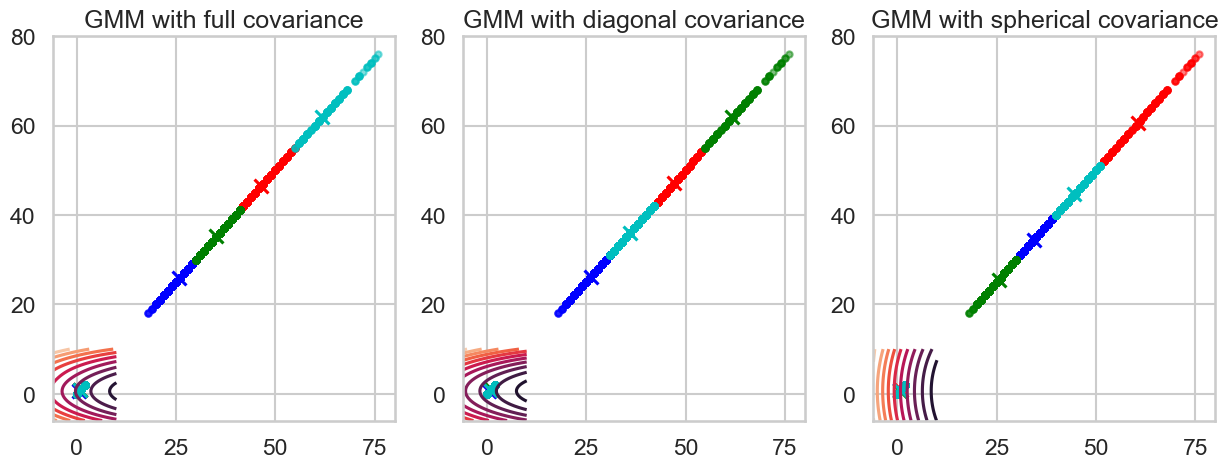

In [209]:
Multi_blob_Data = df[['Age', 'Settlement size']]

# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X, km=None, gmm=None, num_clusters=0, ax=None):
    color = 'brgcmyk'  # List colors
    alpha = 0.5  # color opacity
    s = 20
    if ax is None:
        ax = plt.gca()
    if num_clusters == 0:
        ax.scatter(X[:, 0], X[:, 1], c=color[0], alpha=alpha, s=s)
    elif km is not None:
        for i in range(num_clusters):
            ax.scatter(X[km.predict(X)==i, 0], X[km.predict(X)==i, 1], c=color[i], alpha=alpha, s=s)
            ax.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], c=color[i], marker='x', s=100)
    elif gmm is not None:
        for i in range(num_clusters):
            ax.scatter(X[gmm.predict(X)==i], X[gmm.predict(X)==i], c=color[i], alpha=alpha, s=s)
            ax.scatter(gmm.means_[i], gmm.means_[i], c=color[i], marker='x', s=100)



# Use GaussianMixture function to cluster the data
gmm = GaussianMixture(n_components=4)
gmm.fit(Multi_blob_Data)

# In GMM change the covariance_type and check the difference in the resulting probability fit 
gmm_diag = GaussianMixture(n_components=4, covariance_type='diag')
gmm_diag.fit(Multi_blob_Data)

gmm_spherical = GaussianMixture(n_components=4, covariance_type='spherical')
gmm_spherical.fit(Multi_blob_Data)

# Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot GMM with full covariance type
ax[0].set_title("GMM with full covariance")
display_cluster(Multi_blob_Data, gmm=gmm, num_clusters=4, ax=ax[0])
x = np.linspace(-6, 10)
y = np.linspace(-6, 10)
X_mesh, Y_mesh = np.meshgrid(x, y)
Z_mesh = -gmm.score_samples(np.array([X_mesh.ravel(), Y_mesh.ravel()]).T)
Z_mesh = Z_mesh.reshape(X_mesh.shape)
ax[0].contour(X_mesh, Y_mesh, Z_mesh, levels=10)

# Plot GMM with diagonal covariance type
ax[1].set_title("GMM with diagonal covariance")
display_cluster(Multi_blob_Data, gmm=gmm_diag, num_clusters=4, ax=ax[1])
x = np.linspace(-6, 10)
y = np.linspace(-6, 10)
X_mesh, Y_mesh = np.meshgrid(x, y)
Z_mesh = -gmm_diag.score_samples(np.array([X_mesh.ravel(), Y_mesh.ravel()]).T)
Z_mesh = Z_mesh.reshape(X_mesh.shape)
ax[1].contour(X_mesh, Y_mesh, Z_mesh, levels=10)

# Plot GMM with spherical covariance type
ax[2].set_title("GMM with spherical covariance")
display_cluster(Multi_blob_Data, gmm=gmm_spherical, num_clusters=4, ax=ax[2])
x = np.linspace(-6, 10)
y = np.linspace(-6, 10)
X_mesh, Y_mesh = np.meshgrid(x, y)
Z_mesh = -gmm_spherical.score_samples(np.array([X_mesh.ravel(), Y_mesh.ravel()]).T)
Z_mesh = Z_mesh.reshape(X_mesh.shape)
ax[2].contour(X_mesh, Y_mesh, Z_mesh, levels=10)

plt.show()

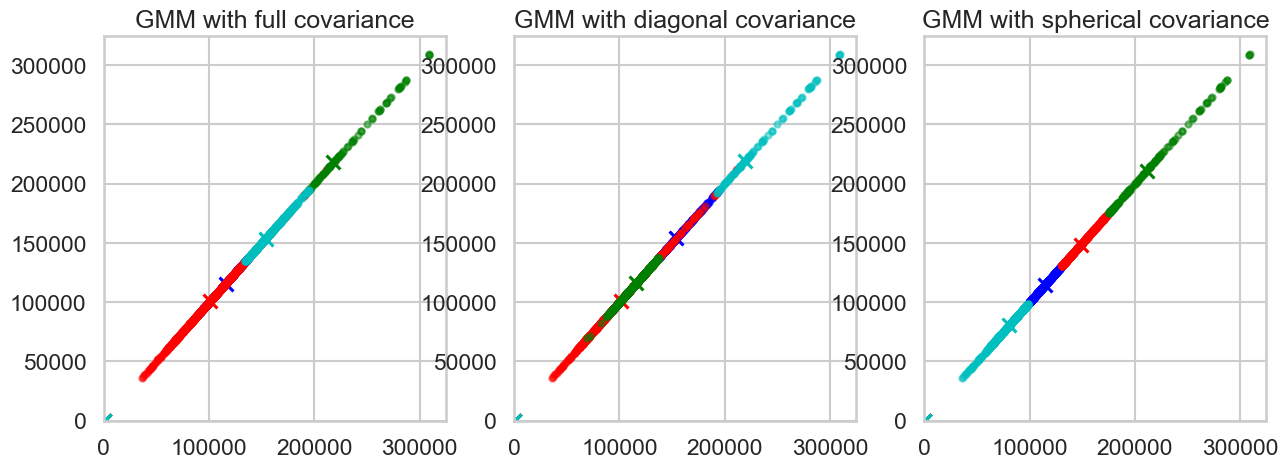

In [210]:
Multi_blob_Data = df[['Income', 'Settlement size']]

# helper function that allows us to display data in 2 dimensions an highlights the clusters
def display_cluster(X, km=None, gmm=None, num_clusters=0, ax=None):
    color = 'brgcmyk'  # List colors
    alpha = 0.5  # color opacity
    s = 20
    if ax is None:
        ax = plt.gca()
    if num_clusters == 0:
        ax.scatter(X[:, 0], X[:, 1], c=color[0], alpha=alpha, s=s)
    elif km is not None:
        for i in range(num_clusters):
            ax.scatter(X[km.predict(X)==i, 0], X[km.predict(X)==i, 1], c=color[i], alpha=alpha, s=s)
            ax.scatter(km.cluster_centers_[i][0], km.cluster_centers_[i][1], c=color[i], marker='x', s=100)
    elif gmm is not None:
        for i in range(num_clusters):
            ax.scatter(X[gmm.predict(X)==i], X[gmm.predict(X)==i], c=color[i], alpha=alpha, s=s)
            ax.scatter(gmm.means_[i], gmm.means_[i], c=color[i], marker='x', s=100)



# Use GaussianMixture function to cluster the data
gmm = GaussianMixture(n_components=4)
gmm.fit(Multi_blob_Data)

# In GMM change the covariance_type and check the difference in the resulting probability fit 
gmm_diag = GaussianMixture(n_components=4, covariance_type='diag')
gmm_diag.fit(Multi_blob_Data)

gmm_spherical = GaussianMixture(n_components=4, covariance_type='spherical')
gmm_spherical.fit(Multi_blob_Data)

# Use a 2D contour plot to plot the resulting distribution (the components of the GMM) as well as the total Gaussian mixture 
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot GMM with full covariance type
ax[0].set_title("GMM with full covariance")
display_cluster(Multi_blob_Data, gmm=gmm, num_clusters=4, ax=ax[0])
x = np.linspace(-6, 10)
y = np.linspace(-6, 10)
X_mesh, Y_mesh = np.meshgrid(x, y)
Z_mesh = -gmm.score_samples(np.array([X_mesh.ravel(), Y_mesh.ravel()]).T)
Z_mesh = Z_mesh.reshape(X_mesh.shape)
ax[0].contour(X_mesh, Y_mesh, Z_mesh, levels=10)

# Plot GMM with diagonal covariance type
ax[1].set_title("GMM with diagonal covariance")
display_cluster(Multi_blob_Data, gmm=gmm_diag, num_clusters=4, ax=ax[1])
x = np.linspace(-6, 10)
y = np.linspace(-6, 10)
X_mesh, Y_mesh = np.meshgrid(x, y)
Z_mesh = -gmm_diag.score_samples(np.array([X_mesh.ravel(), Y_mesh.ravel()]).T)
Z_mesh = Z_mesh.reshape(X_mesh.shape)
ax[1].contour(X_mesh, Y_mesh, Z_mesh, levels=10)

# Plot GMM with spherical covariance type
ax[2].set_title("GMM with spherical covariance")
display_cluster(Multi_blob_Data, gmm=gmm_spherical, num_clusters=4, ax=ax[2])
x = np.linspace(-6, 10)
y = np.linspace(-6, 10)
X_mesh, Y_mesh = np.meshgrid(x, y)
Z_mesh = -gmm_spherical.score_samples(np.array([X_mesh.ravel(), Y_mesh.ravel()]).T)
Z_mesh = Z_mesh.reshape(X_mesh.shape)
ax[2].contour(X_mesh, Y_mesh, Z_mesh, levels=10)

plt.show()